In [5]:
import numpy as np
from lib.dvr2d import *
from lib.utils import *
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = 14
plt.rcParams["figure.dpi"] = 300

%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
r = []
costheta = []
v = []
with open('arhcl.txt', 'r') as f:
# with open('h63.txt', 'r') as f:
    lines = f.readlines()
    for l in lines:
        r.append(float(l[:22]))
        costheta.append(float(l[22:53]))
        v.append(float(l[53:-1]))

r = np.array(r)
costheta = np.array(costheta)
theta = np.arccos(costheta)
v = np.array(v)
print(v.shape)
# print(theta)
print(np.unique(r))
print(np.unique(theta))
print(np.unique(r)[130])

(202101,)
[ 3.      3.0065  3.013  ... 15.987  15.9935 16.    ]
[0.         0.20033484 0.28379411 0.34816602 0.40271584 0.45102681
 0.49493413 0.53552665 0.5735131  0.60938531 0.64350111 0.67613051
 0.70748321 0.73772597 0.76699401 0.79539883 0.82303369 0.84997757
 0.87629806 0.90205362 0.92729522 0.95206764 0.97641053 1.00035922
 1.02394538 1.04719755 1.07014161 1.09280113 1.11519765 1.13735101
 1.15927948 1.18100003 1.20252843 1.22387943 1.24506684 1.26610367
 1.28700222 1.30777412 1.32843048 1.34898186 1.36943841 1.38980988
 1.41010567 1.43033491 1.45050644 1.47062891 1.49071075 1.51076027
 1.53078565 1.55079499 1.57079633 1.59079766 1.610807   1.63083239
 1.65088191 1.67096375 1.69108621 1.71125774 1.73148698 1.75178278
 1.77215425 1.7926108  1.81316218 1.83381853 1.85459044 1.87548898
 1.89652581 1.91771322 1.93906422 1.96059262 1.98231317 2.00424165
 2.026395   2.04879153 2.07145104 2.0943951  2.11764728 2.14123344
 2.16518213 2.18952502 2.21429744 2.23953903 2.26529459 2.2916150

In [3]:
ind_min1 = np.argmin(v)
print(ind_min1)
ind_min2 = np.argmin(v[theta > 1])
print(theta[ind_min1], theta[ind_min2])
print(v[ind_min1], v[ind_min2])
print(r[ind_min1], r[ind_min2])

200254
0.0 3.141592653589793
-175.96843930309217 -148.2856162558519
4.0009999999999994 3.6109999999999998


Text(0.5, 0, '$V$ (cm$^{-1}$)')

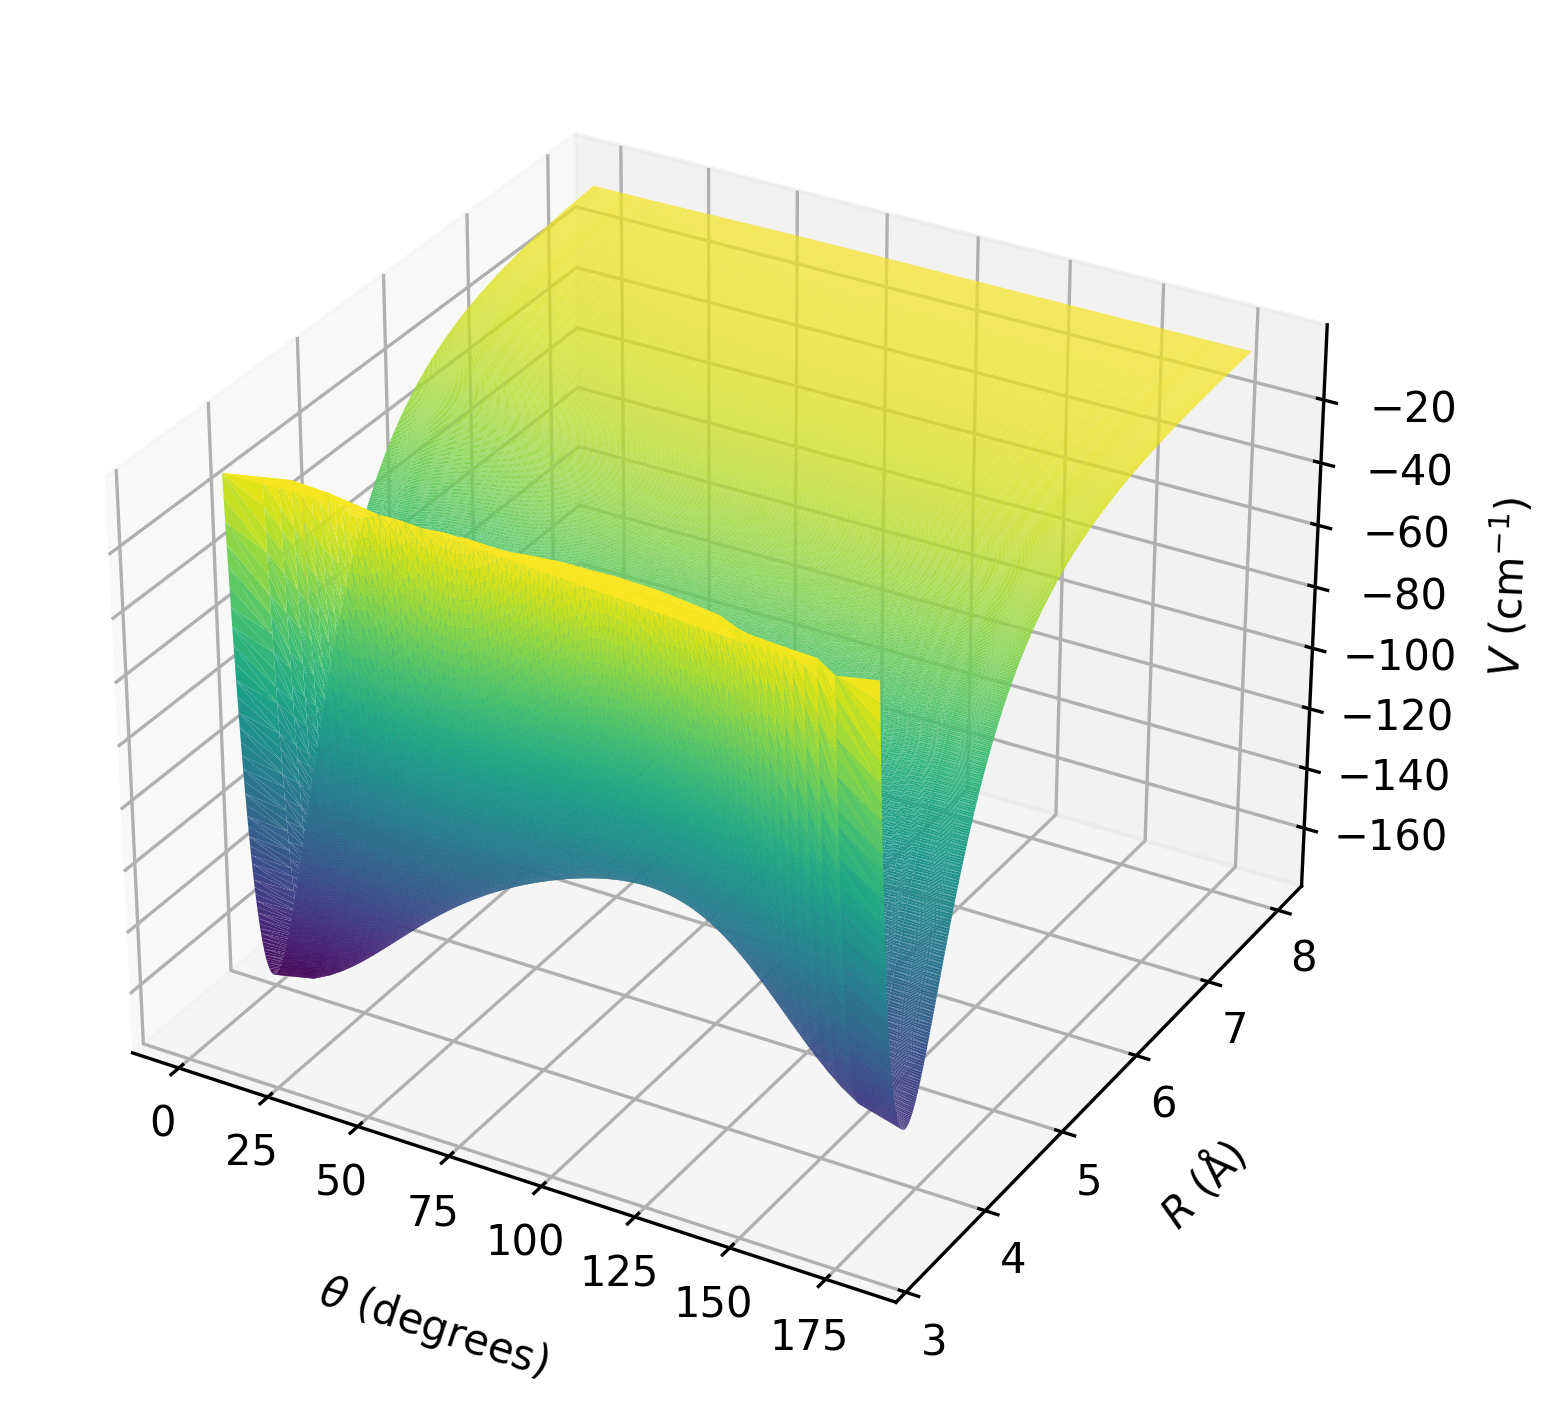

In [7]:
theta_p, r_p, v_p = theta[v < 0], r[v < 0], v[v < 0]
coef = 180 / np.pi

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(theta_p[r_p < 8] * coef, r_p[r_p < 8], v_p[r_p < 8], cmap='viridis')
ax.tick_params('both', labelsize=10, pad=-2)
ax.tick_params('z', labelsize=10, pad=5)
ax.set_xlabel('$\\theta$ (degrees)', labelpad=5, fontsize=10)
ax.set_ylabel('$R$ (Å)', labelpad=0, fontsize=10)
ax.set_zlabel('$V$ (cm$^{-1}$)', labelpad=8, fontsize=10)
# ax.view_init(30, -60)

[-175. -168. -161. -154. -147. -140. -133. -126. -119. -112. -105.]


Text(0, 0.5, '$R$ (A)')

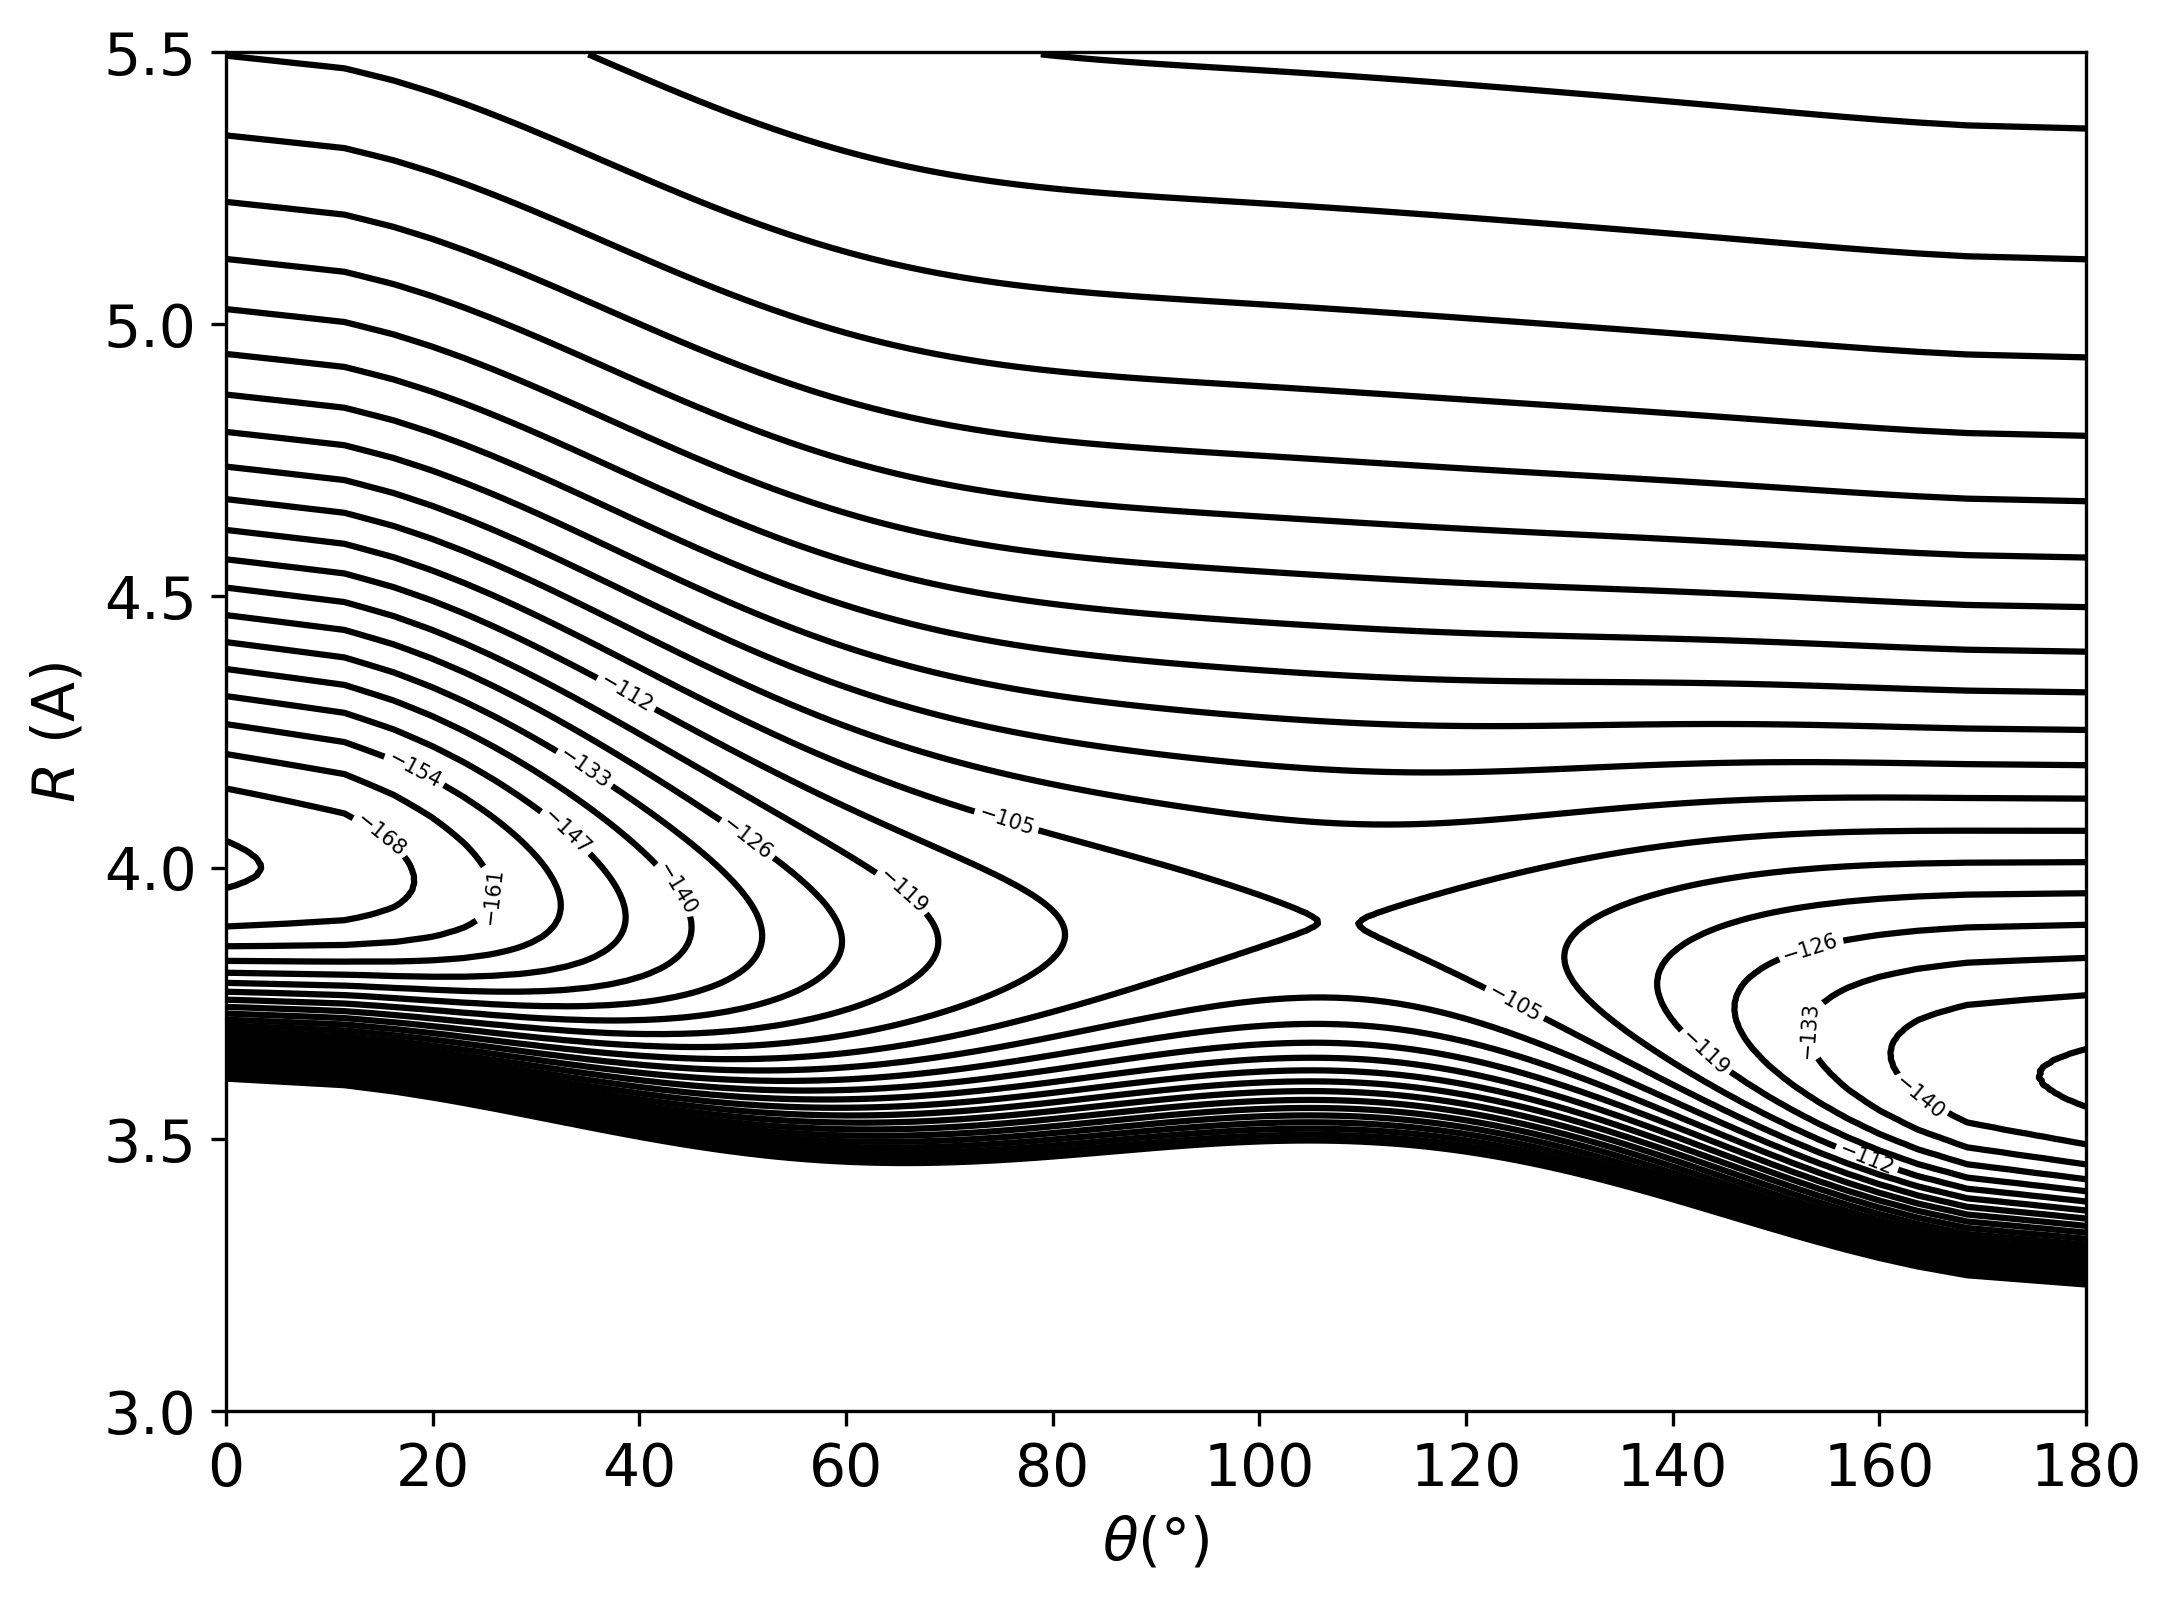

In [52]:
theta_p, r_p, v_p = theta[v < 0], r[v < 0], v[v < 0]
coef = 180 / np.pi
p = plt.tricontour(theta_p[r_p < 5.5] * coef, r_p[r_p < 5.5], v_p[r_p < 5.5], levels=np.linspace(-175, 0, 26), colors='black', linestyles='solid')
# plt.plot(theta[ind_min1] * coef, r[ind_min1], 'x', c='black')
# plt.plot(theta[ind_min2] * coef, r[ind_min2], 'x', c='black')
# plt.plot(1.8754889808102941 * coef, 3.897, '.', c='black')
labels = p.levels[:-15:]
print(labels)
plt.clabel(p, inline=1, fontsize=5, levels=labels)
plt.ylim(3, 5.5)
plt.xlabel('$\\theta (\degree)$')
plt.ylabel('$R$ (A)')

-104.97194472216779
-104.94806936739205
-104.96096302441343
3.8970000000000002
1.8754889808102941


Text(0, 0.5, '$R$ (A)')

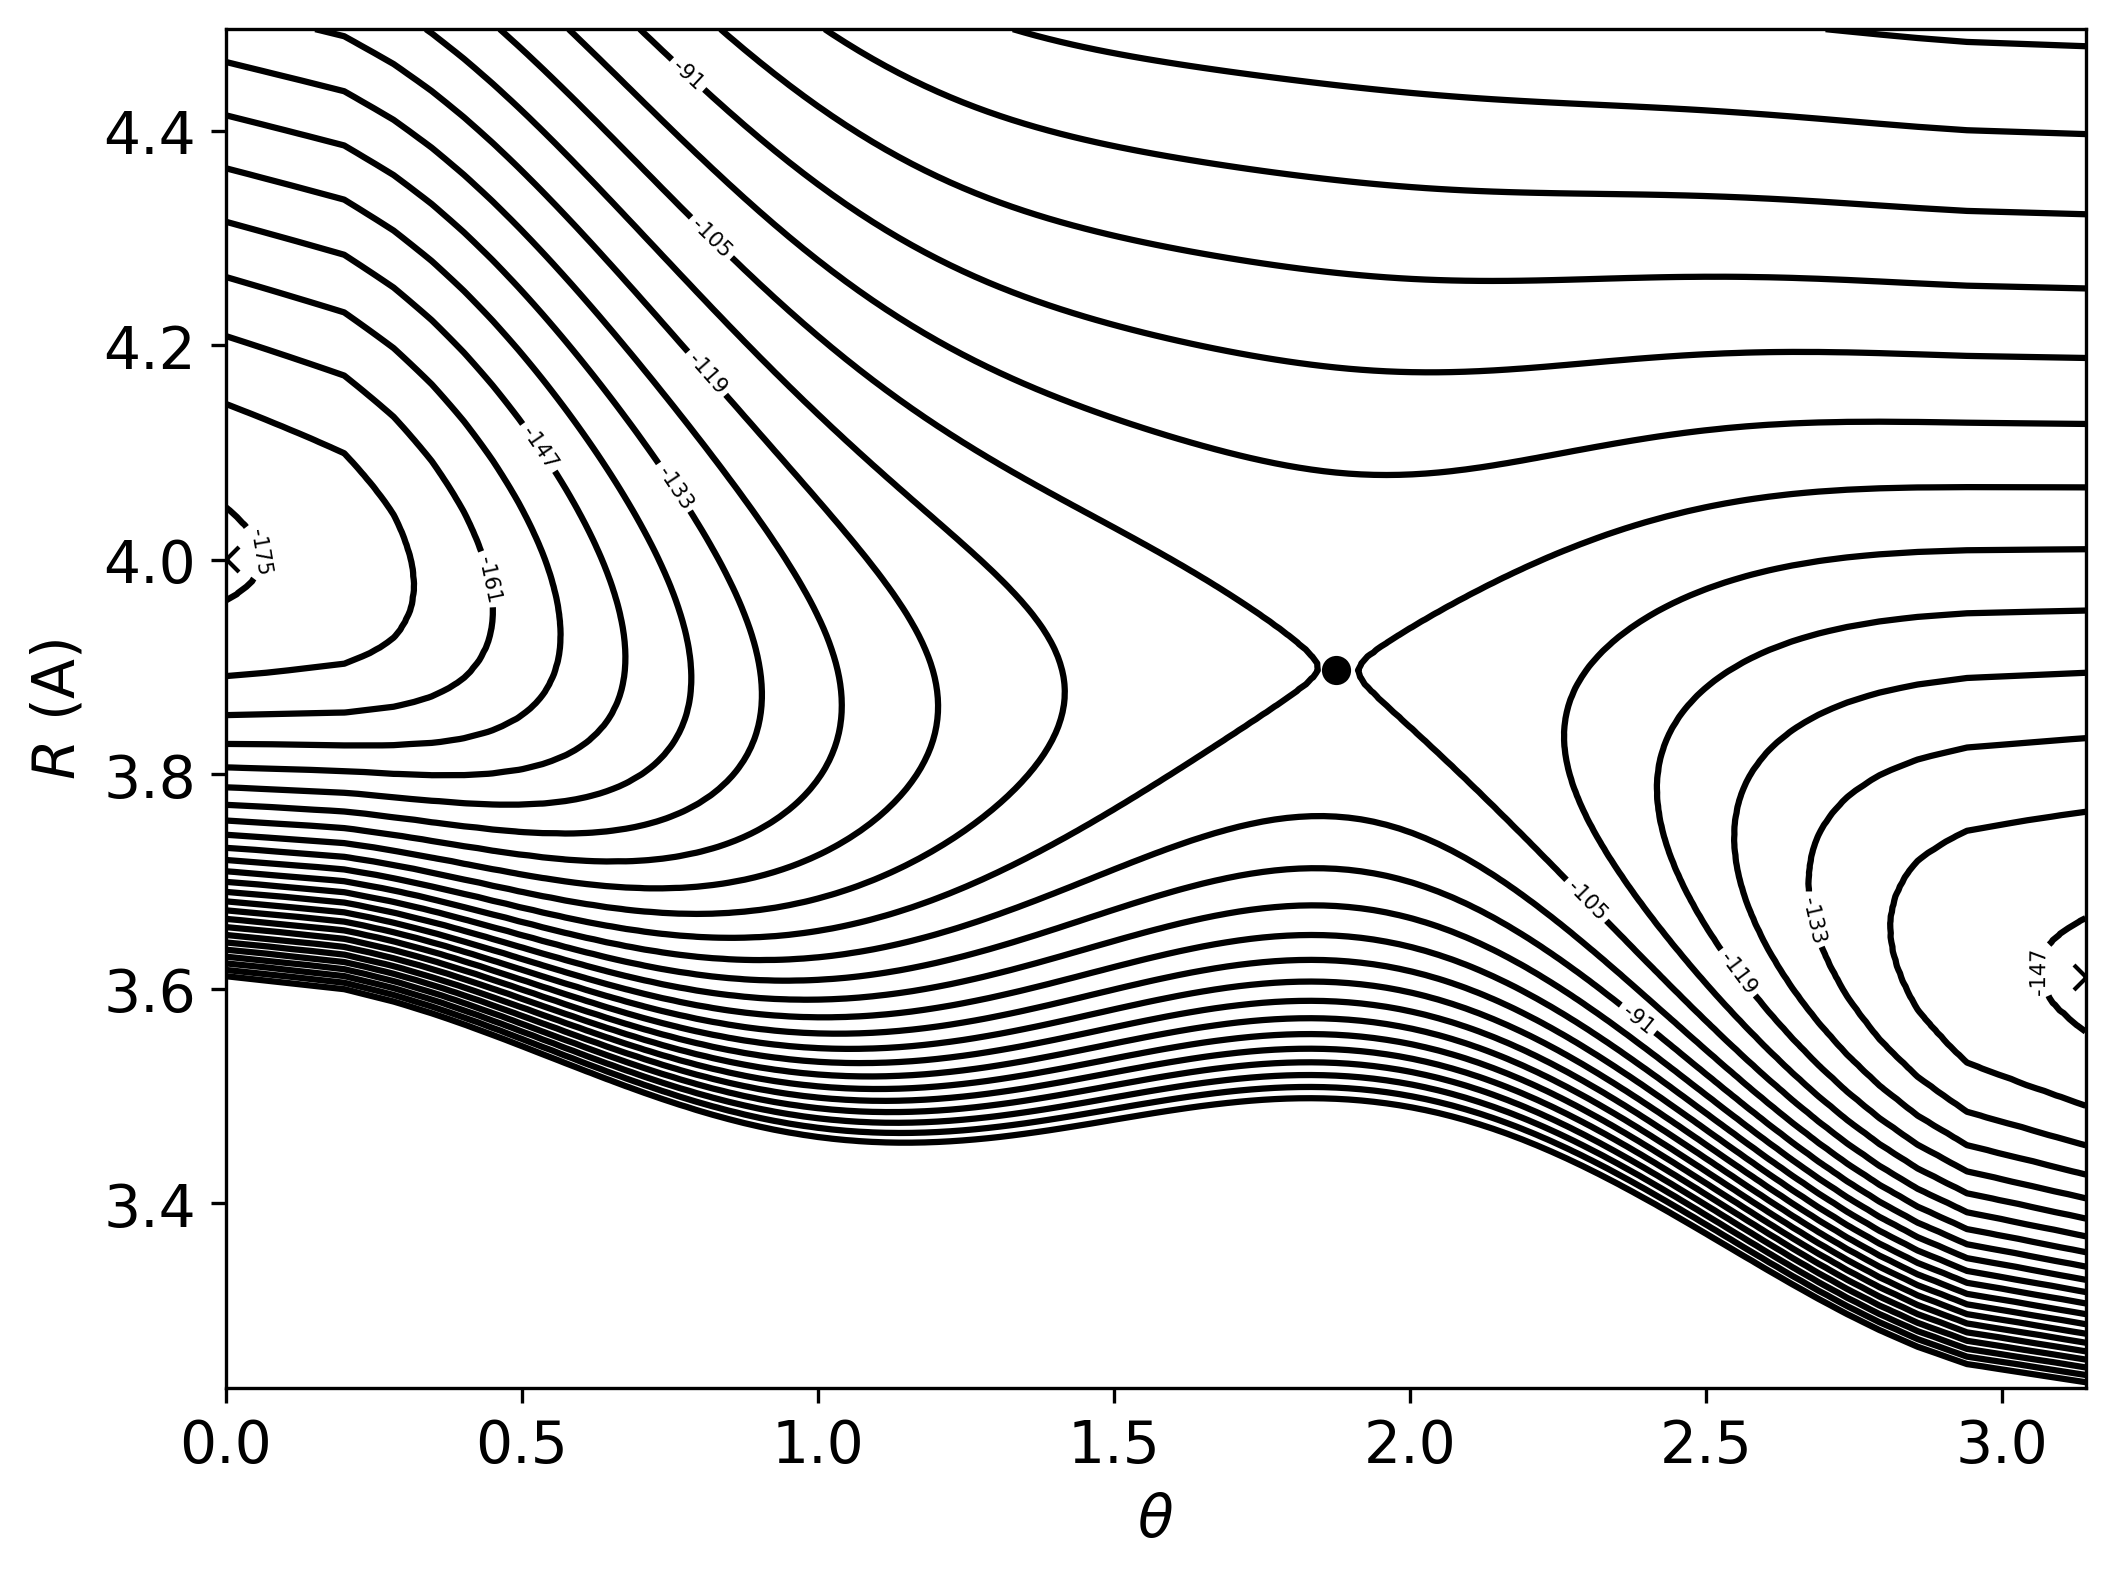

In [10]:
p = plt.tricontour(theta_p[r_p < 4.5], r_p[r_p < 4.5], v_p[r_p < 4.5], levels=np.linspace(-175, 0, 26), colors='black', linestyles='solid')
plt.plot(theta[ind_min1], r[ind_min1], 'x', c='black')
plt.plot(theta[ind_min2], r[ind_min2], 'x', c='black')
plt.plot(1.8754889808102941, 3.897, 'o', c='black')
print(np.min(v[theta == np.unique(theta)[64]]))
print(np.min(v[theta == np.unique(theta)[65]]))
print(np.min(v[theta == np.unique(theta)[66]]))
print(r[np.argmin(v[theta == np.unique(theta)[65]])])
print(np.unique(theta)[65])
labels = p.levels[:-13:2]
plt.clabel(p, inline=1, fontsize=5, levels=labels, fmt='%d')
plt.ylim()
plt.xlabel('$\\theta$')
plt.ylabel('$R$ (A)')

In [11]:
%autoreload
pot2d = interp_pot2d(r, costheta, v)

In [12]:
%autoreload
N_R = 300
N_theta = 20
l = 1
K_max = 1
r_min = 3
r_max = 10

In [13]:
%autoreload
Rs_DVR, Xs_K = get_DVR_Rtheta(N_R, N_theta, K_max, l=l, r_min=r_min, r_max=r_max)
Rs_angs = Rs_DVR * arhcl_params['S'] * au_to_angs
print(Rs_angs)
print(Rs_angs.shape)

[3.00850477 3.01990653 3.03539272 3.05499317 3.07871503 3.10656114
 3.13853318 3.17463245 3.21486017 3.25921756 3.30770589 3.36032655
 3.41708099 3.47797077 3.54299757 3.61216316 3.68546944 3.7629184
 3.84451217 3.93025296 4.02014313 4.11418513 4.21238153 4.31473503
 4.42124843 4.53192464 4.64676671 4.7657778  4.88896118 5.01632024
 5.14785851 5.2835796  5.42348727 5.5675854  5.71587799 5.86836915
 6.02506312 6.18596427 6.35107708 6.52040618 6.6939563  6.87173231
 7.05373919 7.23998208 7.43046622 7.62519699 7.8241799  8.02742059
 8.23492484 8.44669856 8.66274778 8.88307868 9.10769758 9.33661092
 9.5698253  9.80734744]
(56,)


[-115.26650083  -91.64318032  -82.82654138  -65.54796203  -57.5864263 ]


<BarContainer object of 1120 artists>

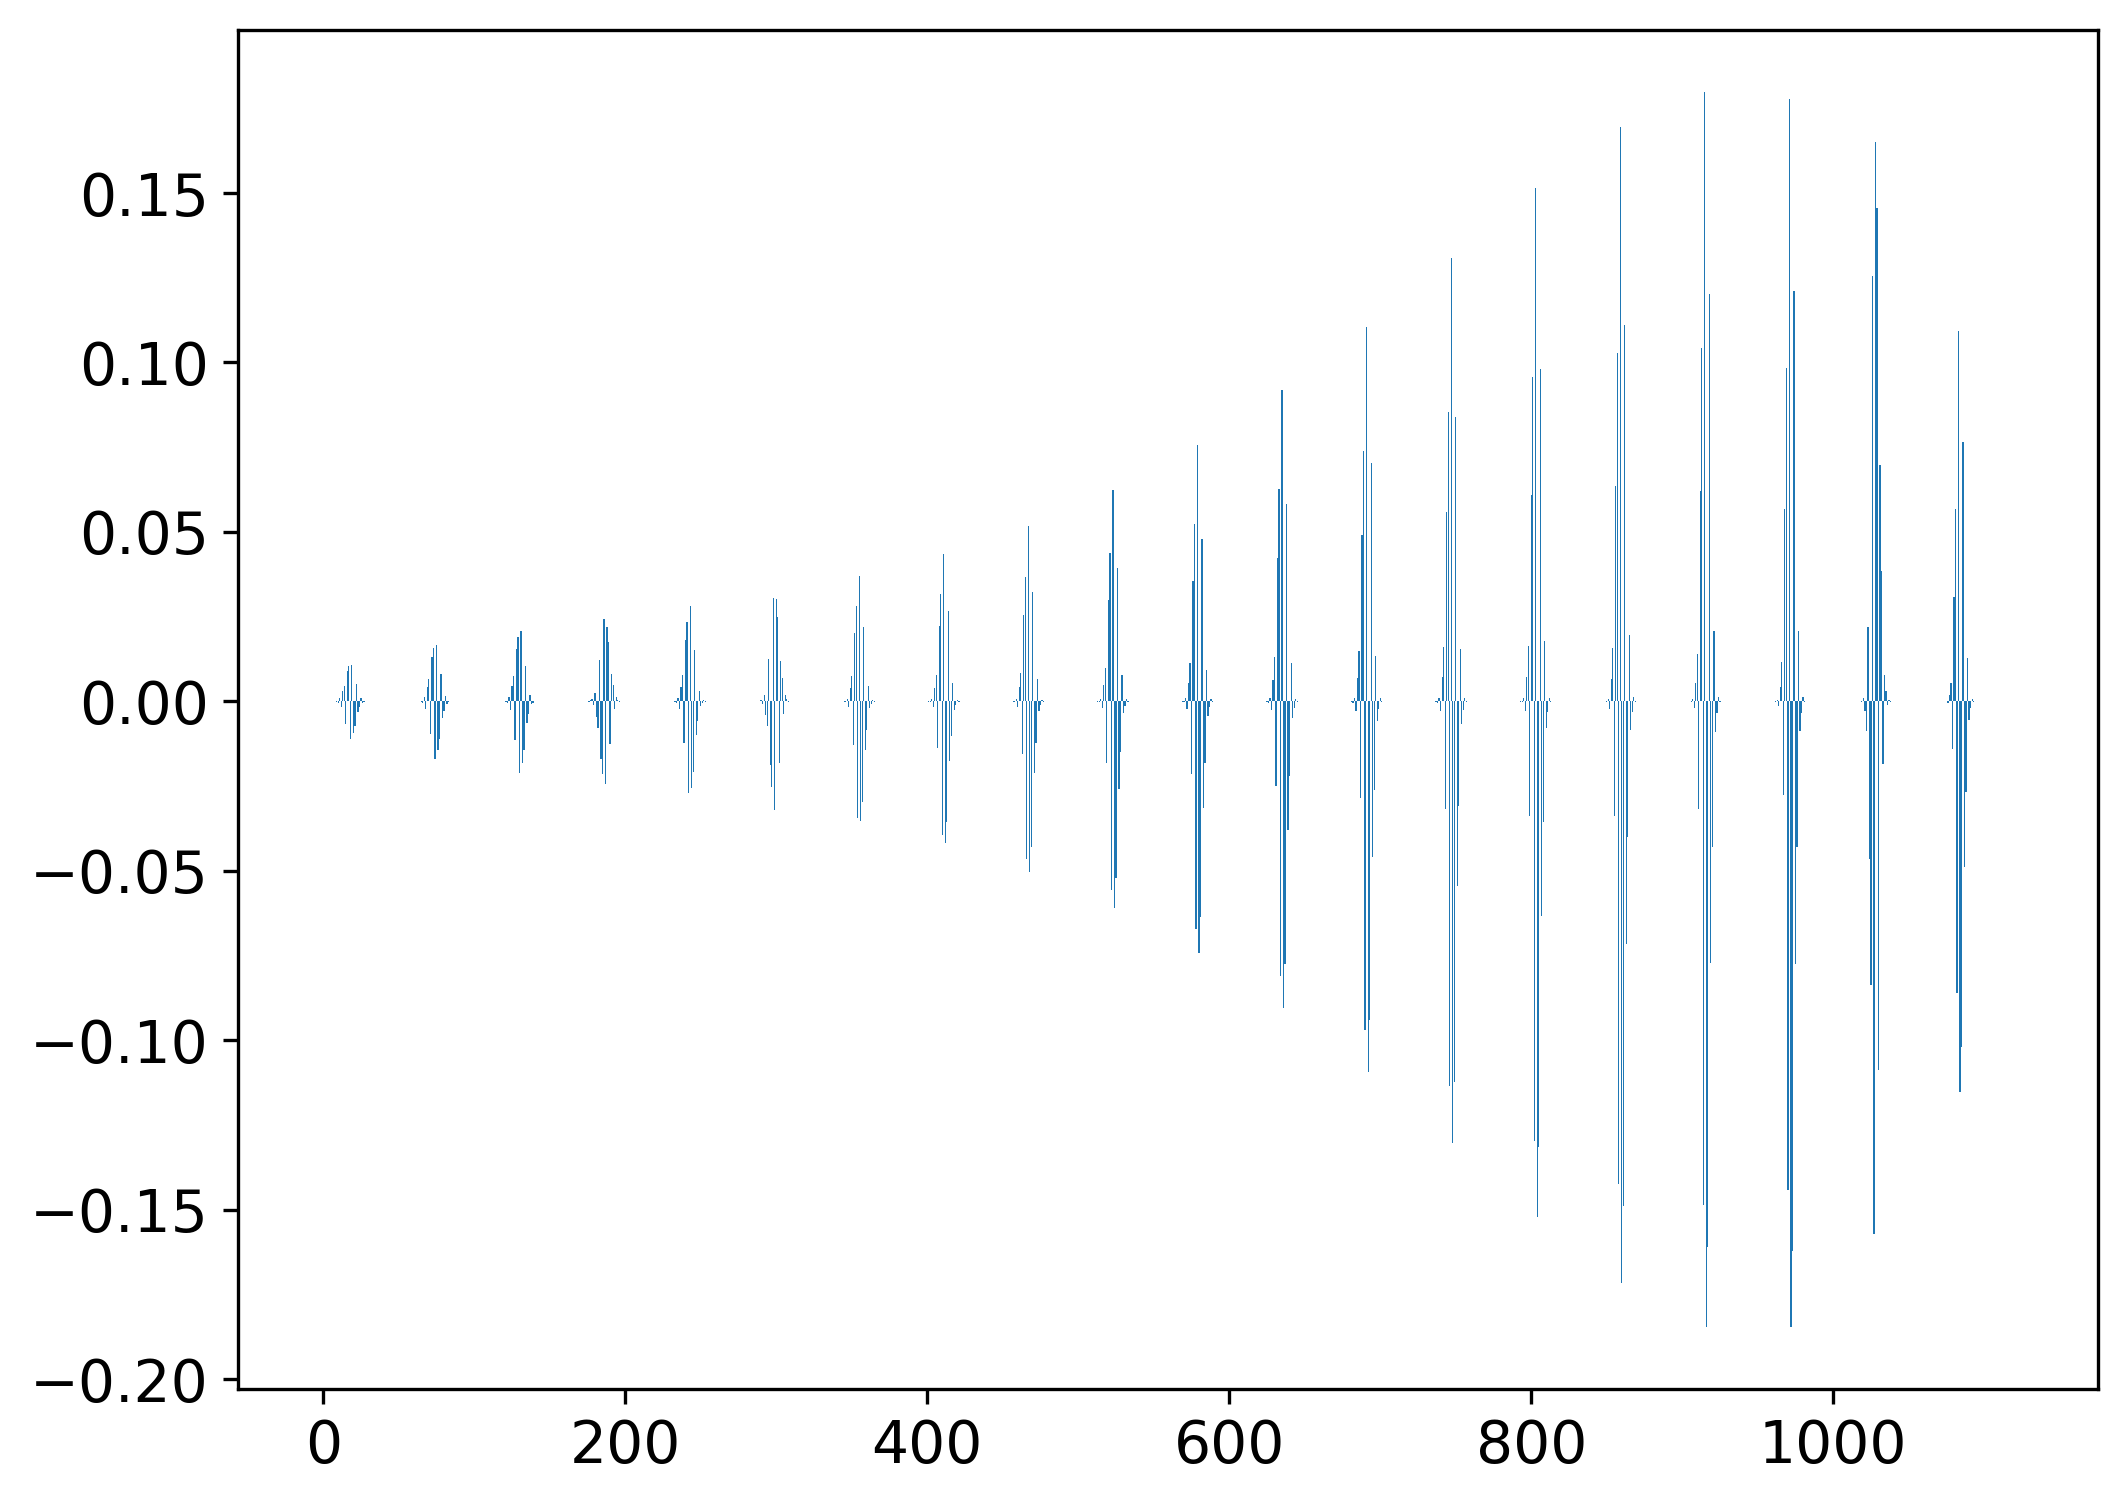

In [14]:
%autoreload
J = 0
h_dvr0 = get_ham_DVR(pot2d, N_R, N_theta, J, K_max, l=l, r_min=r_min, r_max=r_max, trunc=0)
eigvals0, eigvecs0 = np.linalg.eigh(h_dvr0)
print(eigvals0[:5] * hartree)
plt.bar(range(eigvecs0.shape[1]), eigvecs0.T[0])
#114.27496239256004

[-115.15423397  -91.52389464  -82.72103116  -81.37857997  -65.43380274]


<BarContainer object of 2240 artists>

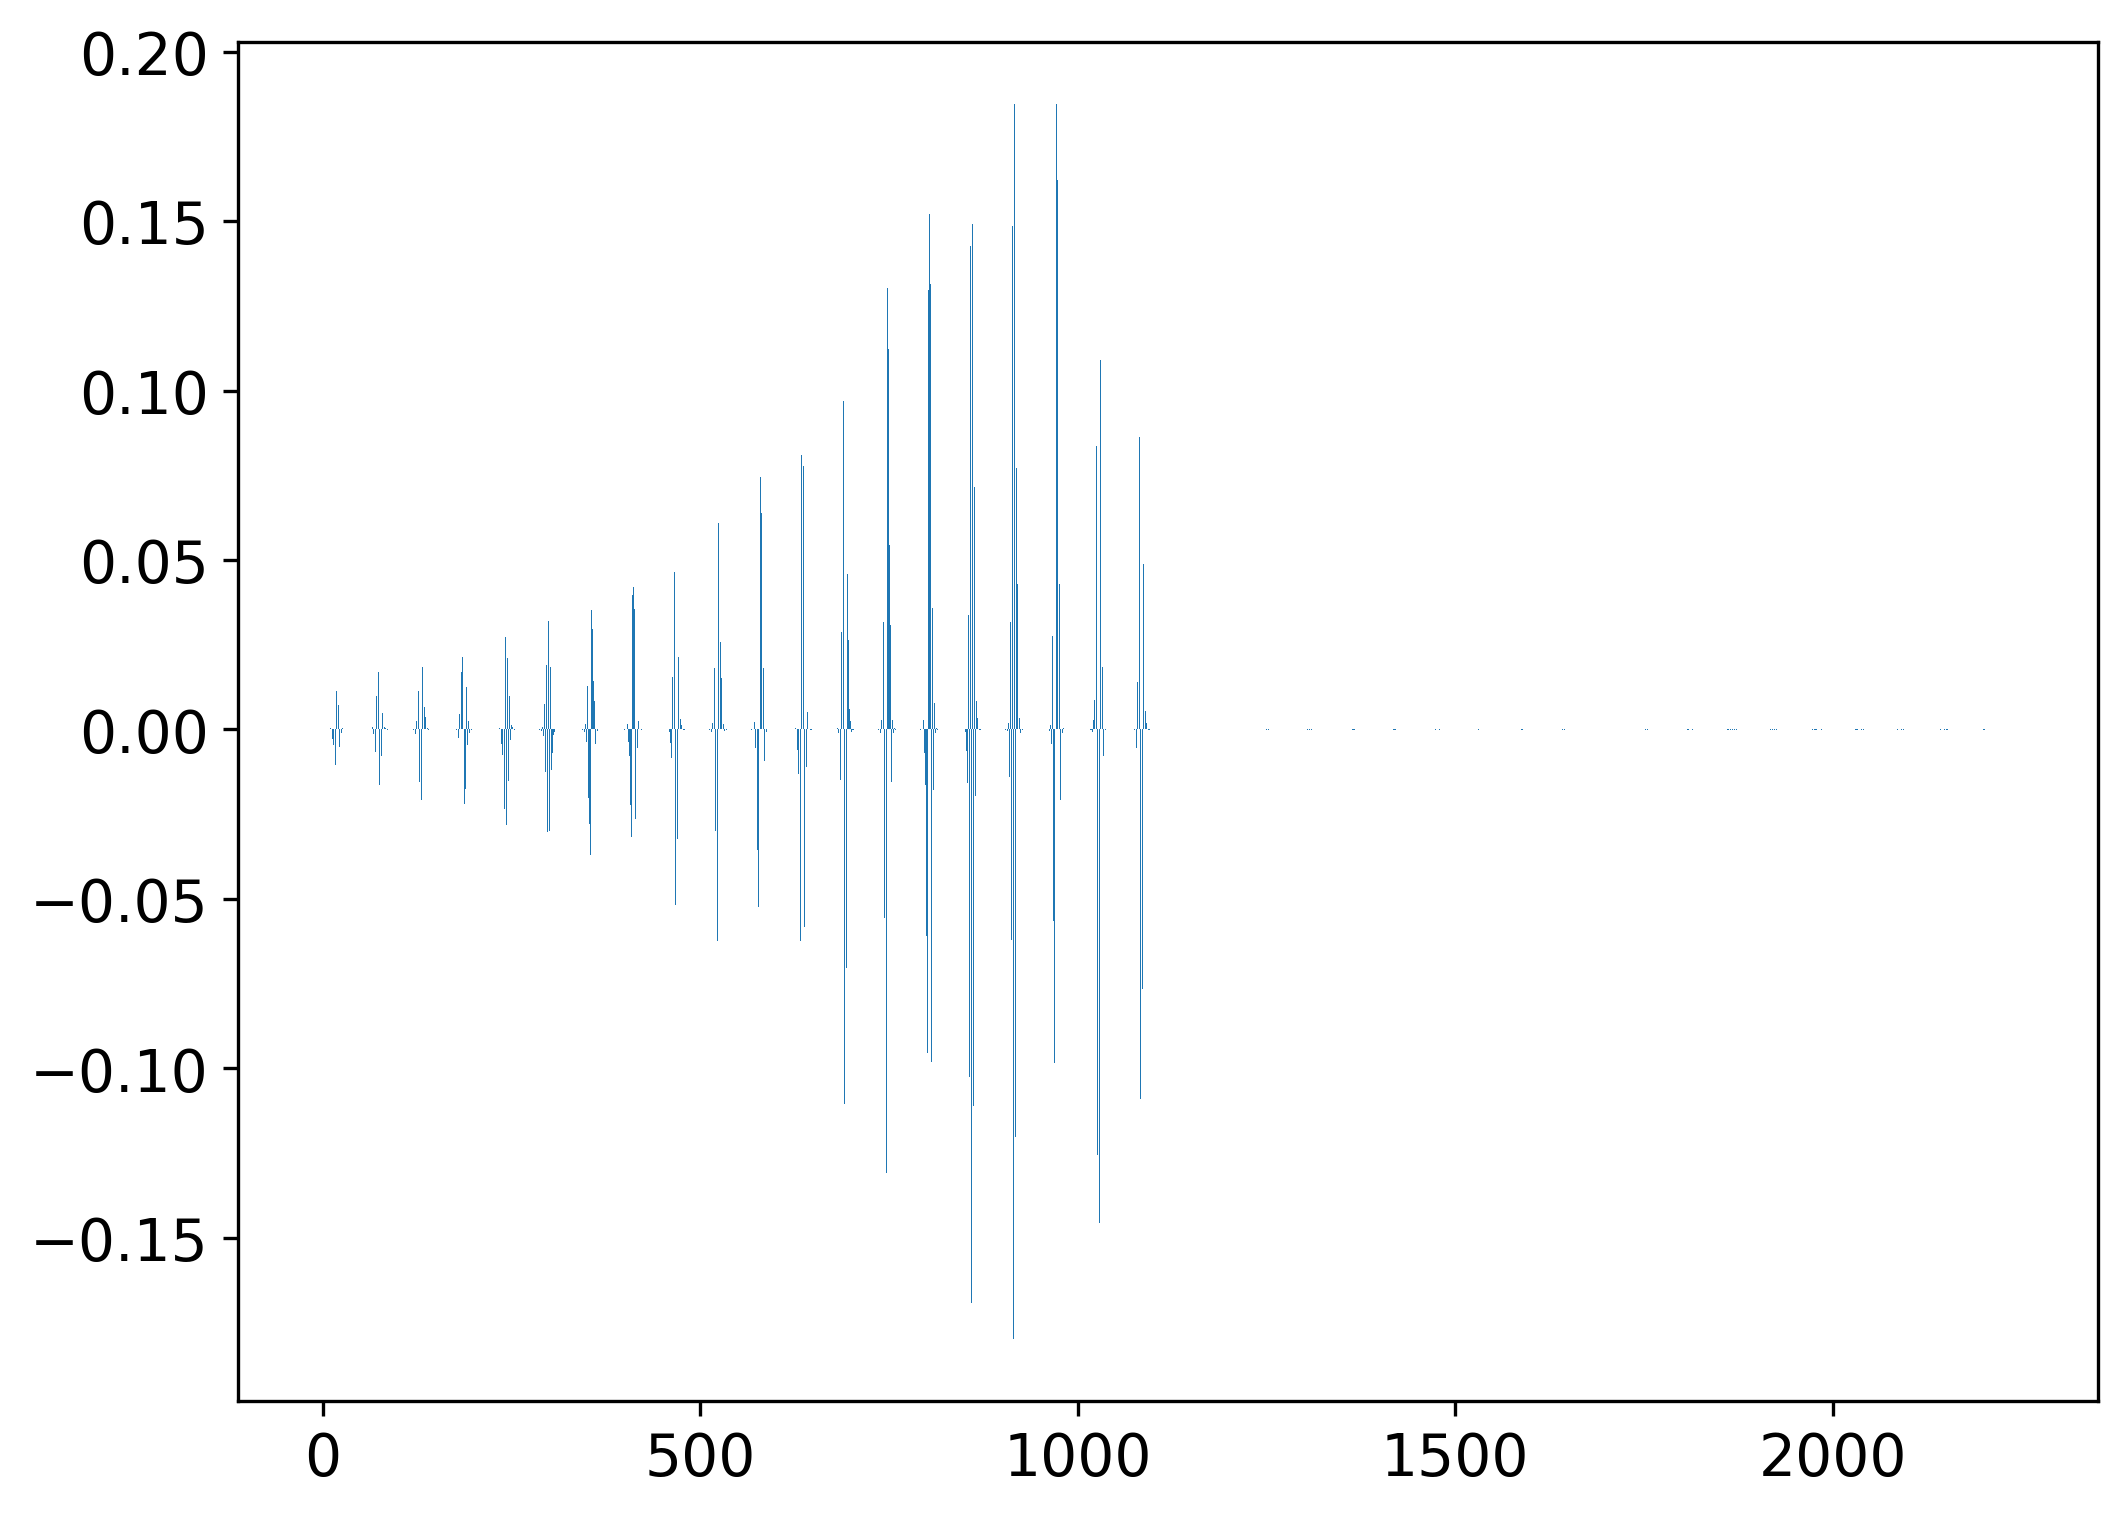

In [11]:
%autoreload
J = 1
h_dvr1 = get_ham_DVR(pot2d, N_R, N_theta, J, K_max, l=l, r_min=r_min, r_max=r_max, trunc=0)
eigvals1, eigvecs1 = np.linalg.eigh(h_dvr1)
print(eigvals1[:5] * hartree)
plt.bar(range(eigvecs1.shape[1]), eigvecs1.T[0])
#114.27496239256004

In [13]:
print((eigvals1[:20] - eigvals0[:20]) * hartree)

[  0.11226685   0.11928568   0.10551023 -15.83061794  -7.84737643
 -10.25071819 -12.5303147  -11.13934674 -20.51991618 -18.92135314
 -20.84697654 -18.68744482 -17.66543059 -16.44307411 -15.81375404
 -15.35960244 -13.14718441 -13.74493629 -12.91585418 -12.90762733]


In [52]:
%autoreload
N_R = 300
N_theta = 20
l = 1
K_max = 0
r_min = 3
r_max = 10

In [53]:
%autoreload
Rs_DVR, Xs_K = get_DVR_Rtheta(N_R, N_theta, 0, l=l, r_min=r_min, r_max=r_max)
Rs_angs = Rs_DVR * arhcl_params['S'] * au_to_angs
print(Rs_angs)
print(Rs_angs.shape)

[3.00850477 3.01990653 3.03539272 3.05499317 3.07871503 3.10656114
 3.13853318 3.17463245 3.21486017 3.25921756 3.30770589 3.36032655
 3.41708099 3.47797077 3.54299757 3.61216316 3.68546944 3.7629184
 3.84451217 3.93025296 4.02014313 4.11418513 4.21238153 4.31473503
 4.42124843 4.53192464 4.64676671 4.7657778  4.88896118 5.01632024
 5.14785851 5.2835796  5.42348727 5.5675854  5.71587799 5.86836915
 6.02506312 6.18596427 6.35107708 6.52040618 6.6939563  6.87173231
 7.05373919 7.23998208 7.43046622 7.62519699 7.8241799  8.02742059
 8.23492484 8.44669856 8.66274778 8.88307868 9.10769758 9.33661092
 9.5698253  9.80734744]
(56,)


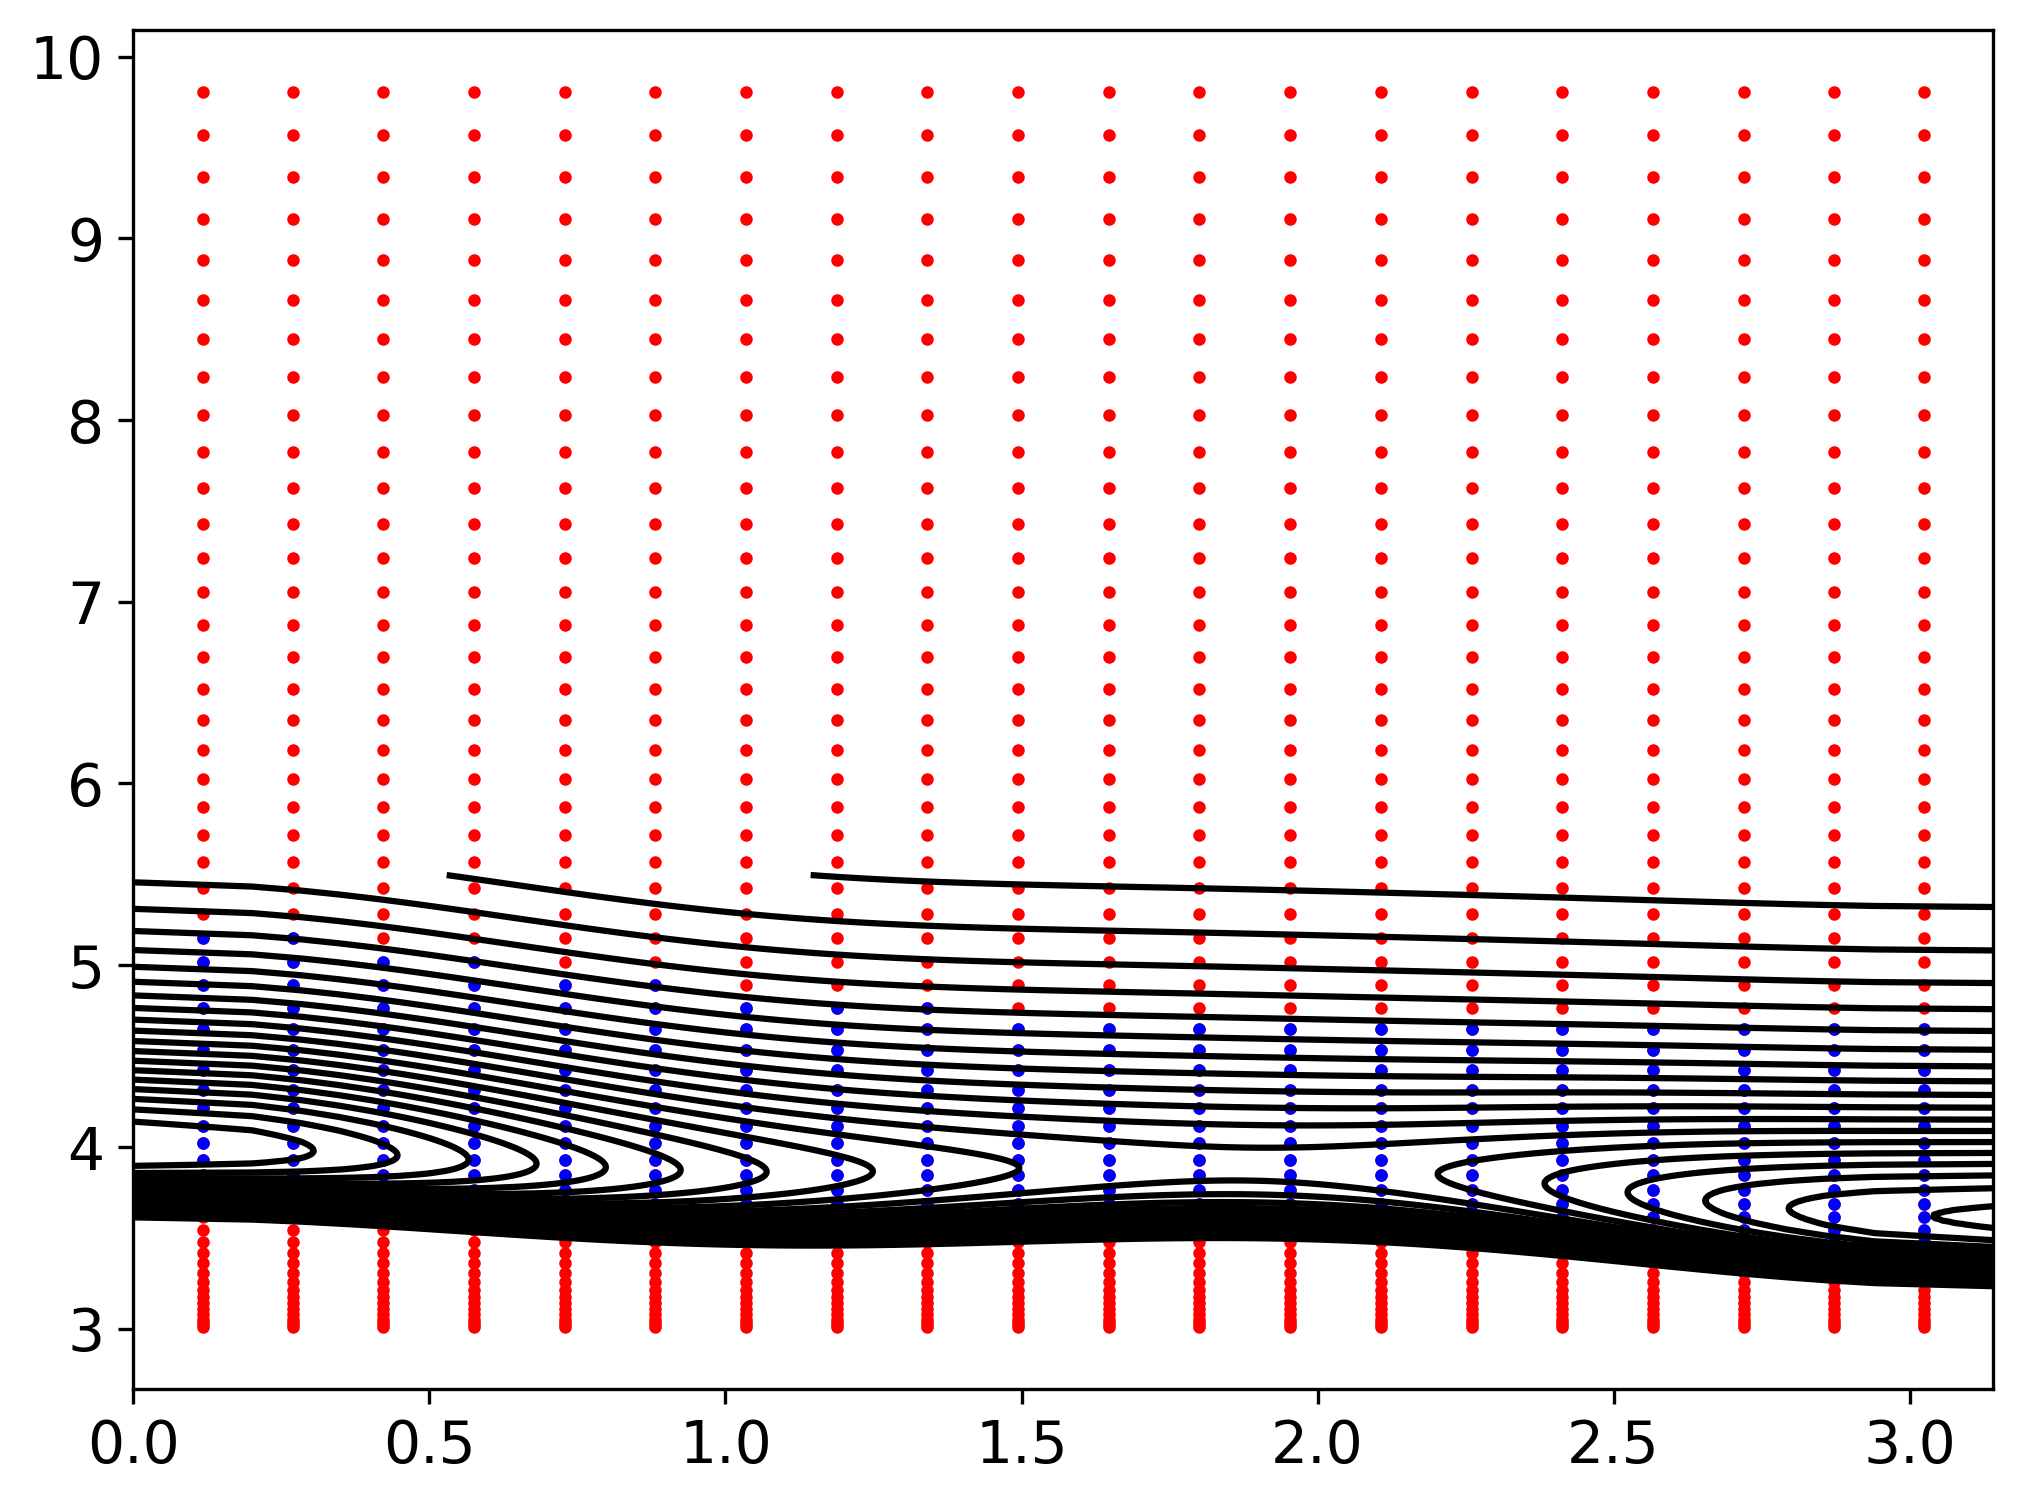

In [54]:
p = plt.tricontour(theta_p[r_p < 5.5], r_p[r_p < 5.5], v_p[r_p < 5.5], levels=np.linspace(np.min(v), 0, 25), colors='black', linestyles='solid')

Rs_grid, Xs_grid = np.meshgrid(Rs_angs, Xs_K[0])
Rs_grid, Xs_grid = Rs_grid.flatten(), Xs_grid.flatten()
Vs = pot2d(Rs_grid, Xs_grid)
plt.scatter(np.arccos(Xs_grid), Rs_grid, s=4, c='r')
plt.scatter(np.arccos(Xs_grid[Vs < -50]), Rs_grid[Vs < -50], s=4, c='b')

-115.26650082519174 [-1.44689652e-07 -4.21773045e-07  9.59047935e-07 ...  2.17113003e-08
 -2.20031134e-08 -2.63050684e-08]


<BarContainer object of 1120 artists>

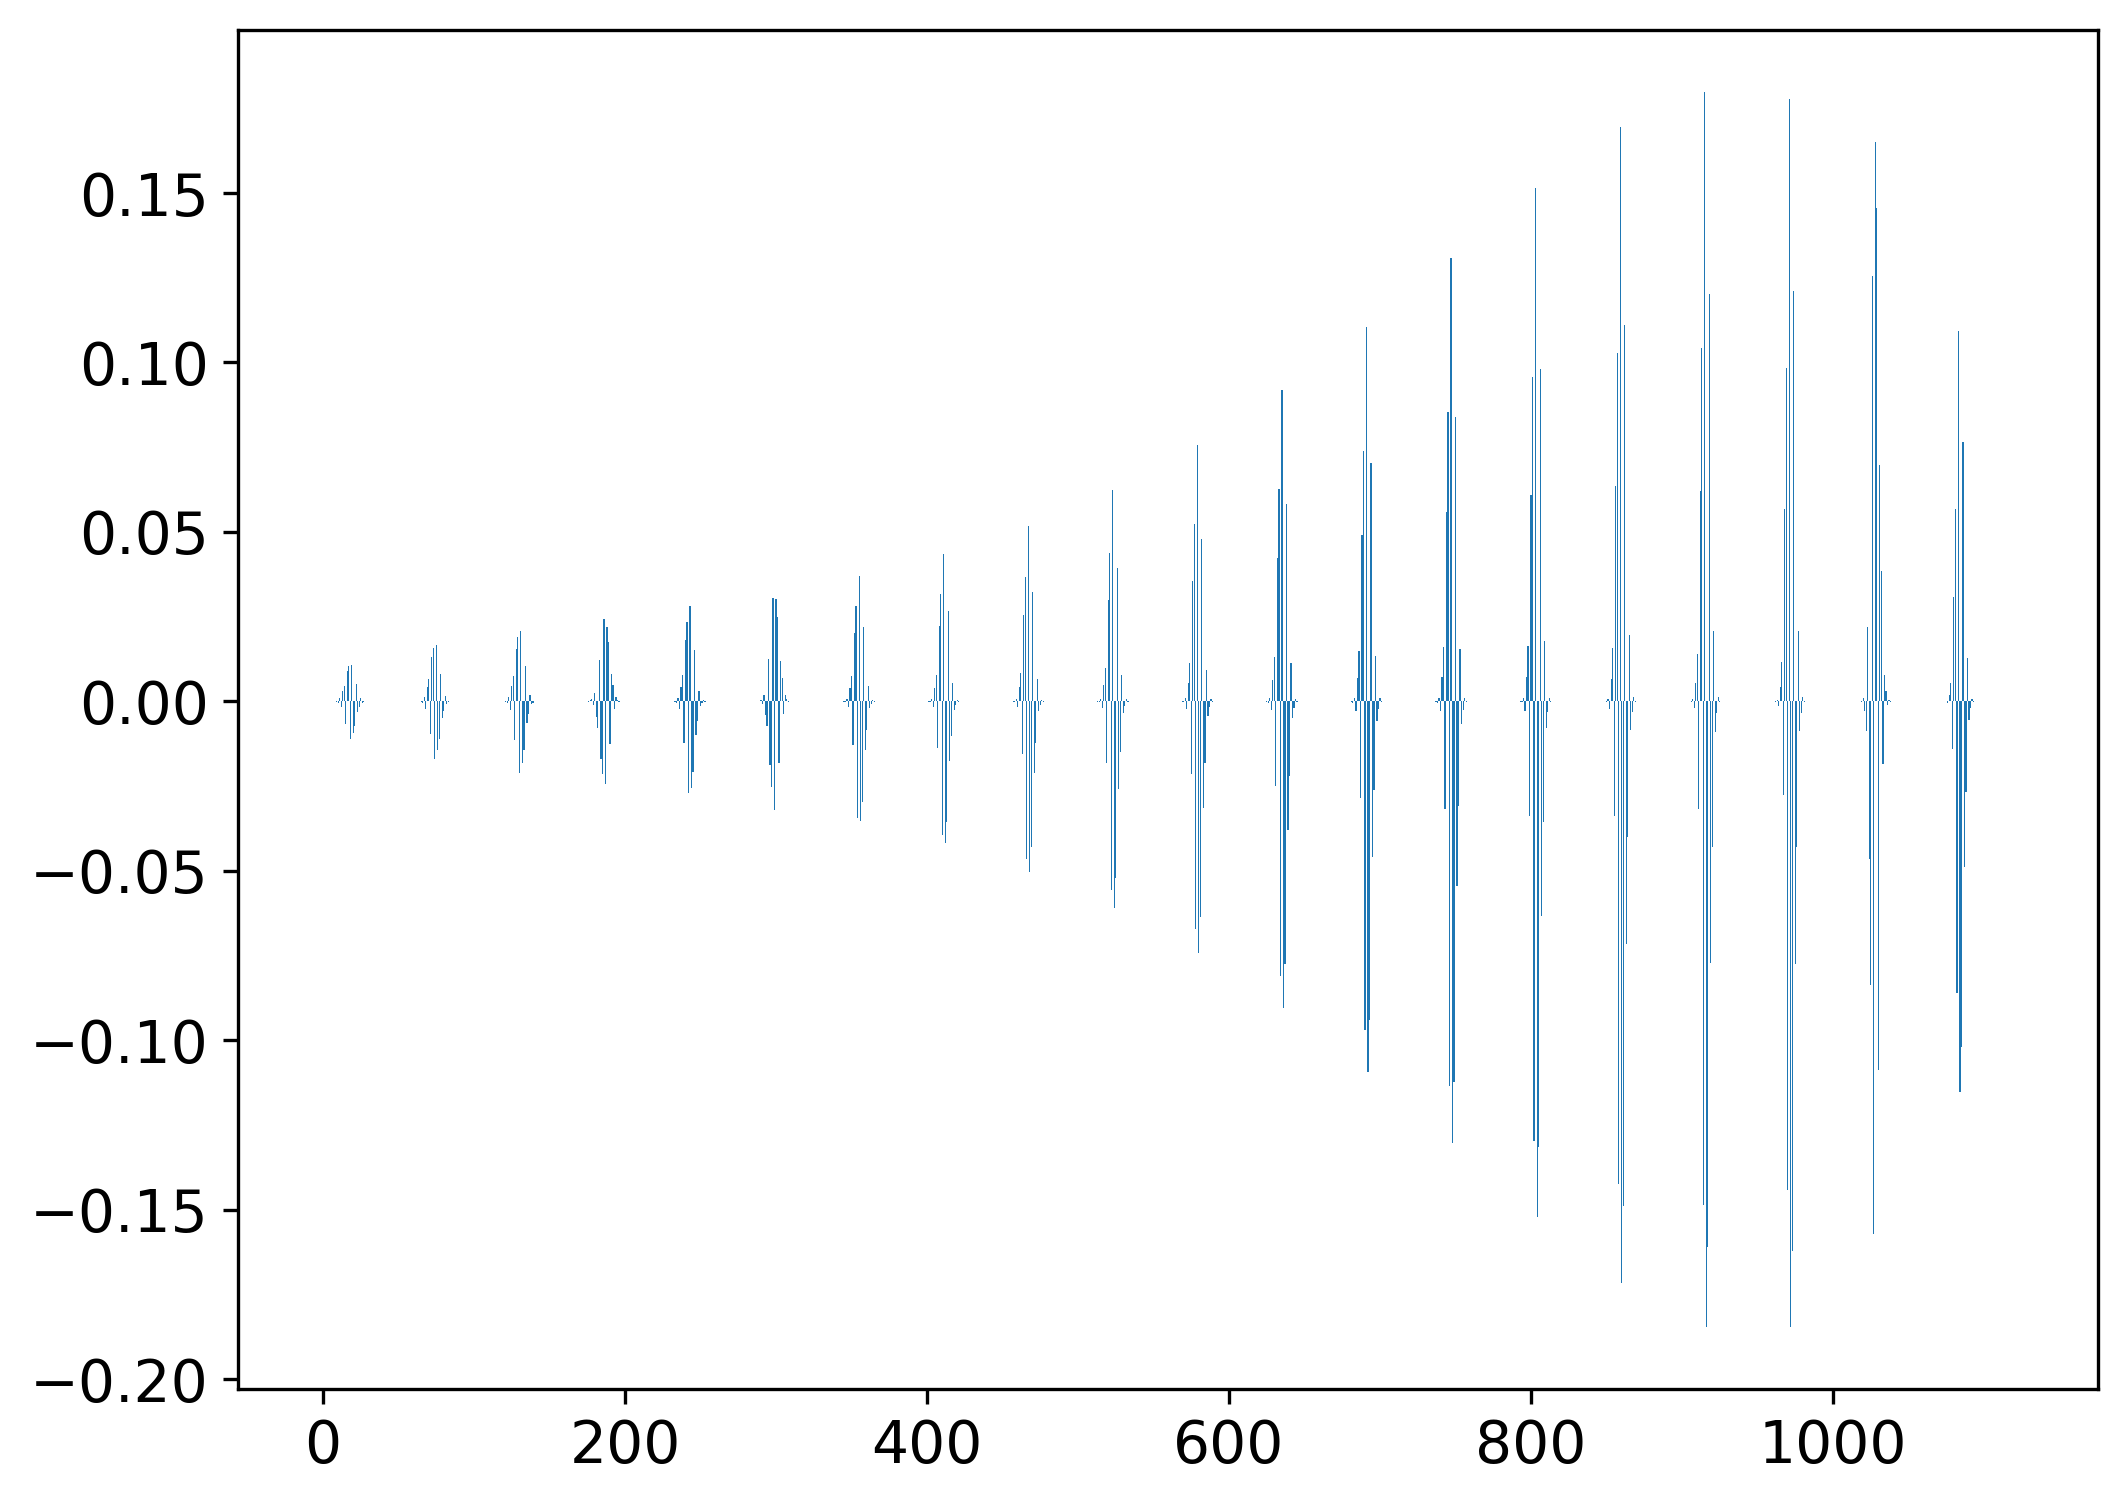

In [55]:
%autoreload
h_dvr = get_ham_DVR(pot2d, N_R, N_theta, 0, 0, l=l, r_min=r_min, r_max=r_max, trunc=0)
eigvals, eigvecs = np.linalg.eigh(h_dvr)
print(eigvals[0] * hartree, eigvecs.T[0])
plt.bar(range(eigvecs.shape[1]), eigvecs.T[0])

In [ ]:
h_dvr = get_ham_DVR(pot2d, N_R, N_theta, 0, 0, l=l, r_min=r_min, r_max=r_max, trunc=2)
eigvals, eigvecs = np.linalg.eigh(h_dvr)
print(eigvals[0] * hartree, eigvecs.T[0])
plt.bar(range(eigvecs.shape[1]), -eigvecs.T[0])

In [15]:
%autoreload
N_R = 400
N_theta = 20
l = 1
K_max = 1

r_min = 3.0
r_max = 12

Rs_DVR, Xs_K = get_DVR_Rtheta(N_R, N_theta, K_max, l=l, r_min=r_min, r_max=r_max)
N_R_lim = Rs_DVR.shape[0]

J = 0
h_dvr0 = get_ham_DVR(pot2d, N_R, N_theta, J, K_max, l=l, r_min=r_min, r_max=r_max, trunc=0)
eigvals0, eigvecs0 = np.linalg.eigh(h_dvr0)
print(f'[{r_min:.1f}, {r_max:.1f}], J = {J}, N_R = {N_R_lim}, N_theta = {N_theta}: {eigvals0[0] * hartree}')
ref_energy = eigvals0[0] * hartree

J = 1
h_dvr1 = get_ham_DVR(pot2d, N_R, N_theta, J, K_max, l=l, r_min=r_min, r_max=r_max, trunc=0)
eigvals1, eigvecs1 = np.linalg.eigh(h_dvr1)
print(f'[{r_min:.1f}, {r_max:.1f}], J = {J}, N_R = {N_R_lim}, N_theta = {N_theta}: {eigvals1[0] * hartree}, diff = {eigvals1[0] * hartree - ref_energy:.5f}')


[3.0, 12.0], J = 0, N_R = 74, N_theta = 20: -115.26503452563881
[3.0, 12.0], J = 1, N_R = 74, N_theta = 20: -115.15276858268108, diff = 0.11227


In [16]:
print('J = 0')
for i in range(10):
    print(f'E{i} - E0 = {eigvals0[i] * hartree - ref_energy}')

print('J = 1')
for i in range(10):
    print(f'E1,{i} - E0 = {eigvals1[i] * hartree - ref_energy}')

J = 0
E0 - E0 = 0.0
E1 - E0 = 23.622891070088002
E2 - E0 = 32.44003102008733
E3 - E0 = 49.71844259260838
E4 - E0 = 57.67942425585938
E5 - E0 = 68.03040473582111
E6 - E0 = 75.0086690313948
E7 - E0 = 79.2768726037618
E8 - E0 = 90.43707340598442
E9 - E0 = 94.0373085565839
J = 1
E1,0 - E0 = 0.11226594295773396
E1,1 - E0 = 23.742175530416773
E1,2 - E0 = 32.54554052145501
E1,3 - E0 = 33.88580776446702
E1,4 - E0 = 49.83260153017608
E1,5 - E0 = 57.77916143717996
E1,6 - E0 = 62.47685086133128
E1,7 - E0 = 68.13778296715083
E1,8 - E0 = 69.91582503185585
E1,9 - E0 = 75.1160148065016


In [17]:
%autoreload
N_R = 200
N_theta = 10
l = 1
K_max = 0

r_min = 3.0
r_max_list = [4, 4.5, 5, 6, 7, 8, 10, 12, 16]
for r_max in r_max_list:
    Rs_DVR, Xs_K = get_DVR_Rtheta(N_R, N_theta, 0, l=l, r_min=r_min, r_max=r_max)
    N_R_lim = Rs_DVR.shape[0]
    h_dvr = get_ham_DVR(pot2d, N_R, N_theta, 0, 0, l=l, r_min=r_min, r_max=r_max, trunc=0)
    eigvals, eigvecs = np.linalg.eigh(h_dvr)
    print(f'[{r_min:.1f}, {r_max:.1f}], N_R = {N_R_lim}, N_theta = {N_theta}: {eigvals[0] * hartree:.5f}, diff = {eigvals[0] * hartree - ref_energy:.5f}')

[3.0, 4.0], N_R = 16, N_theta = 10: -85.49039, diff = 29.77465
[3.0, 4.5], N_R = 20, N_theta = 10: -114.87842, diff = 0.38662
[3.0, 5.0], N_R = 24, N_theta = 10: -115.26699, diff = -0.00196
[3.0, 6.0], N_R = 29, N_theta = 10: -115.26702, diff = -0.00198
[3.0, 7.0], N_R = 34, N_theta = 10: -115.26702, diff = -0.00198
[3.0, 8.0], N_R = 38, N_theta = 10: -115.26702, diff = -0.00198
[3.0, 10.0], N_R = 46, N_theta = 10: -115.26702, diff = -0.00198
[3.0, 12.0], N_R = 52, N_theta = 10: -115.26702, diff = -0.00198
[3.0, 16.0], N_R = 62, N_theta = 10: -115.26702, diff = -0.00198


In [18]:
%autoreload
N_R = 200
N_theta = 20
l = 1
K_max = 0

r_min = 3.0
r_max_list = [4, 4.5, 5, 6, 7, 8, 10, 12, 16]
for r_max in r_max_list:
    Rs_DVR, Xs_K = get_DVR_Rtheta(N_R, N_theta, 0, l=l, r_min=r_min, r_max=r_max)
    N_R_lim = Rs_DVR.shape[0]
    h_dvr = get_ham_DVR(pot2d, N_R, N_theta, 0, 0, l=l, r_min=r_min, r_max=r_max, trunc=0)
    eigvals, eigvecs = np.linalg.eigh(h_dvr)
    print(f'[{r_min:.1f}, {r_max:.1f}], N_R = {N_R_lim}, N_theta = {N_theta}: {eigvals[0] * hartree:.5f}, diff = {eigvals[0] * hartree - ref_energy:.5f}')

[3.0, 4.0], N_R = 16, N_theta = 20: -85.49134, diff = 29.77370
[3.0, 4.5], N_R = 20, N_theta = 20: -114.87930, diff = 0.38573
[3.0, 5.0], N_R = 24, N_theta = 20: -115.26786, diff = -0.00283
[3.0, 6.0], N_R = 29, N_theta = 20: -115.26788, diff = -0.00285
[3.0, 7.0], N_R = 34, N_theta = 20: -115.26788, diff = -0.00285
[3.0, 8.0], N_R = 38, N_theta = 20: -115.26788, diff = -0.00285
[3.0, 10.0], N_R = 46, N_theta = 20: -115.26788, diff = -0.00285
[3.0, 12.0], N_R = 52, N_theta = 20: -115.26788, diff = -0.00285
[3.0, 16.0], N_R = 62, N_theta = 20: -115.26788, diff = -0.00285


In [19]:
%autoreload
N_R_list = [50, 100, 200, 300, 400, 600]
N_theta = 10
l = 1
K_max = 0

r_min = 3.0
r_max = 6
for N_R in N_R_list:
    Rs_DVR, Xs_K = get_DVR_Rtheta(N_R, N_theta, 0, l=l, r_min=r_min, r_max=r_max)
    N_R_lim = Rs_DVR.shape[0]
    h_dvr = get_ham_DVR(pot2d, N_R, N_theta, 0, 0, l=l, r_min=r_min, r_max=r_max, trunc=0)
    eigvals, eigvecs = np.linalg.eigh(h_dvr)
    print(f'[{r_min:.1f}, {r_max:.1f}], N_R = {N_R_lim}, N_theta = {N_theta}: {eigvals[0] * hartree:.5f}, diff = {eigvals[0] * hartree - ref_energy:.5f}')

[3.0, 6.0], N_R = 14, N_theta = 10: -115.25872, diff = 0.00632
[3.0, 6.0], N_R = 20, N_theta = 10: -115.26246, diff = 0.00257
[3.0, 6.0], N_R = 29, N_theta = 10: -115.26702, diff = -0.00198
[3.0, 6.0], N_R = 36, N_theta = 10: -115.26761, diff = -0.00257
[3.0, 6.0], N_R = 42, N_theta = 10: -115.26465, diff = 0.00039
[3.0, 6.0], N_R = 52, N_theta = 10: -115.26632, diff = -0.00129


In [19]:
%autoreload
N_R = 200
N_theta = 10
l = 1
K_max = 0

r_min_list = [3.0, 3.2, 3.4, 3.6, 3.8, 4]
r_max = 5
for r_min in r_min_list:
    Rs_DVR, Xs_K = get_DVR_Rtheta(N_R, N_theta, 0, l=l, r_min=r_min, r_max=r_max)
    N_R_lim = Rs_DVR.shape[0]
    h_dvr = get_ham_DVR(pot2d, N_R, N_theta, 0, 0, l=l, r_min=r_min, r_max=r_max, trunc=0)
    eigvals, eigvecs = np.linalg.eigh(h_dvr)
    print(f'[{r_min:.1f}, {r_max:.1f}], N_R = {N_R_lim}, N_theta = {N_theta}: {eigvals[0] * hartree:.5f}, diff = {eigvals[0] * hartree - ref_energy:.5f}')

[3.0, 5.0], N_R = 24, N_theta = 10: -115.26699, diff = -0.00196
[3.2, 5.0], N_R = 22, N_theta = 10: -115.26638, diff = -0.00135
[3.4, 5.0], N_R = 21, N_theta = 10: -115.24130, diff = 0.02374
[3.6, 5.0], N_R = 20, N_theta = 10: -113.89290, diff = 1.37214
[3.8, 5.0], N_R = 18, N_theta = 10: -104.14606, diff = 11.11898
[4.0, 5.0], N_R = 16, N_theta = 10: -84.86684, diff = 30.39819


In [20]:
%autoreload
N_R = 200
l = 1
K_max = 0

r_min = 3.0
r_max_list = 5
N_thetas = [20, 10, 8, 5, 4, 3, 2]
for N_theta in N_thetas:
    Rs_DVR, Xs_K = get_DVR_Rtheta(N_R, N_theta, 0, l=l, r_min=r_min, r_max=r_max)
    N_R_lim = Rs_DVR.shape[0]
    h_dvr = get_ham_DVR(pot2d, N_R, N_theta, 0, 0, l=l, r_min=r_min, r_max=r_max, trunc=0)
    eigvals, eigvecs = np.linalg.eigh(h_dvr)
    print(f'[{r_min:.1f}, {r_max:.1f}], N_R = {N_R_lim}, N_theta = {N_theta}: {eigvals[0] * hartree:.5f}, diff = {eigvals[0] * hartree - ref_energy:.5f}')

[3.0, 5.0], N_R = 24, N_theta = 20: -115.26786, diff = -0.00283
[3.0, 5.0], N_R = 24, N_theta = 10: -115.26699, diff = -0.00196
[3.0, 5.0], N_R = 24, N_theta = 8: -115.26923, diff = -0.00420
[3.0, 5.0], N_R = 24, N_theta = 5: -115.33085, diff = -0.06581
[3.0, 5.0], N_R = 24, N_theta = 4: -115.20217, diff = 0.06286
[3.0, 5.0], N_R = 24, N_theta = 3: -113.49082, diff = 1.77422
[3.0, 5.0], N_R = 24, N_theta = 2: -107.32525, diff = 7.93979


In [21]:
%autoreload

N_R = 200
N_theta = 8
l = 1
K_max = 0

r_min = 3.0
r_max = 5
truncs = [0, 20, 10, 5, 3, 2, 1]
for t in truncs:
    Rs_DVR, Xs_K = get_DVR_Rtheta(N_R, N_theta, 0, l=l, r_min=r_min, r_max=r_max)
    N_R_lim = Rs_DVR.shape[0]
    h_dvr = get_ham_DVR(pot2d, N_R, N_theta, 0, 0, l=l, r_min=r_min, r_max=r_max, trunc=t)
    eigvals, eigvecs = np.linalg.eigh(h_dvr)
    print(f'[{r_min:.1f}, {r_max:.1f}], N_R = {N_R_lim}, P = {t if t != 0 else N_R_lim}, N_theta = {N_theta}: {eigvals[0] * hartree:.5f}, diff = {eigvals[0] * hartree - ref_energy:.5f}')

[3.0, 5.0], N_R = 24, P = 24, N_theta = 8: -115.26923, diff = -0.00420
[3.0, 5.0], N_R = 24, P = 20, N_theta = 8: -115.26923, diff = -0.00420
[3.0, 5.0], N_R = 24, P = 10, N_theta = 8: -115.26921, diff = -0.00417
[3.0, 5.0], N_R = 24, P = 5, N_theta = 8: -115.25888, diff = 0.00616
[3.0, 5.0], N_R = 24, P = 3, N_theta = 8: -115.17372, diff = 0.09131
[3.0, 5.0], N_R = 24, P = 2, N_theta = 8: -114.93605, diff = 0.32899
[3.0, 5.0], N_R = 24, P = 1, N_theta = 8: -113.65425, diff = 1.61079


In [22]:
%autoreload

N_R = 200
l = 1
K_max = 0

r_min = 3.0
r_max = 16
t = 0
N_thetas = [20, 10, 8, 5, 4, 3, 2]
for N_theta in N_thetas:
    Rs_DVR, Xs_K = get_DVR_Rtheta(N_R, N_theta, 0, l=l, r_min=r_min, r_max=r_max)
    N_R_lim = Rs_DVR.shape[0]
    h_dvr = get_ham_DVR(pot2d, N_R, N_theta, 0, 0, l=l, r_min=r_min, r_max=r_max, trunc=t)
    eigvals, eigvecs = np.linalg.eigh(h_dvr)
    print(f'[{r_min:.1f}, {r_max:.1f}], N_R = {N_R_lim}, P = {t if t != 0 else N_R_lim}, N_theta = {N_theta}: {eigvals[0] * hartree:.5f}, diff = {eigvals[0] * hartree - ref_energy:.5f}')

[3.0, 16.0], N_R = 62, P = 62, N_theta = 20: -115.26788, diff = -0.00285
[3.0, 16.0], N_R = 62, P = 62, N_theta = 10: -115.26702, diff = -0.00198
[3.0, 16.0], N_R = 62, P = 62, N_theta = 8: -115.26926, diff = -0.00422
[3.0, 16.0], N_R = 62, P = 62, N_theta = 5: -115.33087, diff = -0.06583
[3.0, 16.0], N_R = 62, P = 62, N_theta = 4: -115.20219, diff = 0.06284
[3.0, 16.0], N_R = 62, P = 62, N_theta = 3: -113.49084, diff = 1.77420
[3.0, 16.0], N_R = 62, P = 62, N_theta = 2: -107.32527, diff = 7.93977


In [8]:
%autoreload
N_R = 200
N_theta = 10
l = 1
K_max = 0
P = 0
r_min = 3.0
r_max = 5.0

Rs_DVR, Xs_K = get_DVR_Rtheta(N_R, N_theta, 0, l=l, r_min=r_min, r_max=r_max)
N_R_lim = Rs_DVR.shape[0]
h_dvr = get_ham_DVR(pot2d, N_R, N_theta, 0, 0, l=l, r_min=r_min, r_max=r_max, trunc=P)
eigvals, eigvecs = np.linalg.eigh(h_dvr)
# print(f'[{r_min:.1f}, {r_max:.1f}], N_R = {N_R_lim}, N_theta = {N_theta}: {eigvals[0] * hartree}, diff = {eigvals[0] * hartree - ref_energy:.5f}')

-0.0005251950513411487 [ 4.67336112e-07  1.34645258e-06 -3.58509218e-06  8.73348366e-06
  2.28258513e-05 -6.06682710e-05  1.63666634e-04  4.30176962e-04
 -1.07316932e-03  2.46707401e-03  5.10735180e-03 -9.33318976e-03
  1.48370530e-02 -2.02988068e-02 -2.37396695e-02  2.36456408e-02
 -2.00390351e-02 -1.44600359e-02  8.90585692e-03 -4.69553317e-03
  2.12846990e-03  8.31573391e-04 -2.80875336e-04  7.44454530e-05
 -3.38564311e-07 -9.04354664e-07  2.63725192e-06 -6.52185531e-06
 -1.81638611e-05  5.09265132e-05 -1.46594956e-04 -4.11249117e-04
  1.09783470e-03 -2.69972194e-03 -5.97179548e-03  1.16306937e-02
 -1.96313100e-02  2.83726384e-02  3.48415012e-02 -3.61892377e-02
  3.17480607e-02  2.35376267e-02 -1.47857045e-02  7.89685788e-03
 -3.60401517e-03 -1.41030680e-03  4.75157875e-04 -1.25365055e-04
 -1.52360293e-07 -2.59761819e-07  1.13115692e-06 -2.65498245e-06
 -8.50578691e-06  2.57270807e-05 -8.26858572e-05 -2.57785988e-04
  7.68693093e-04 -2.10796790e-03 -5.18488100e-03  1.11627118e-02
 -

<BarContainer object of 240 artists>

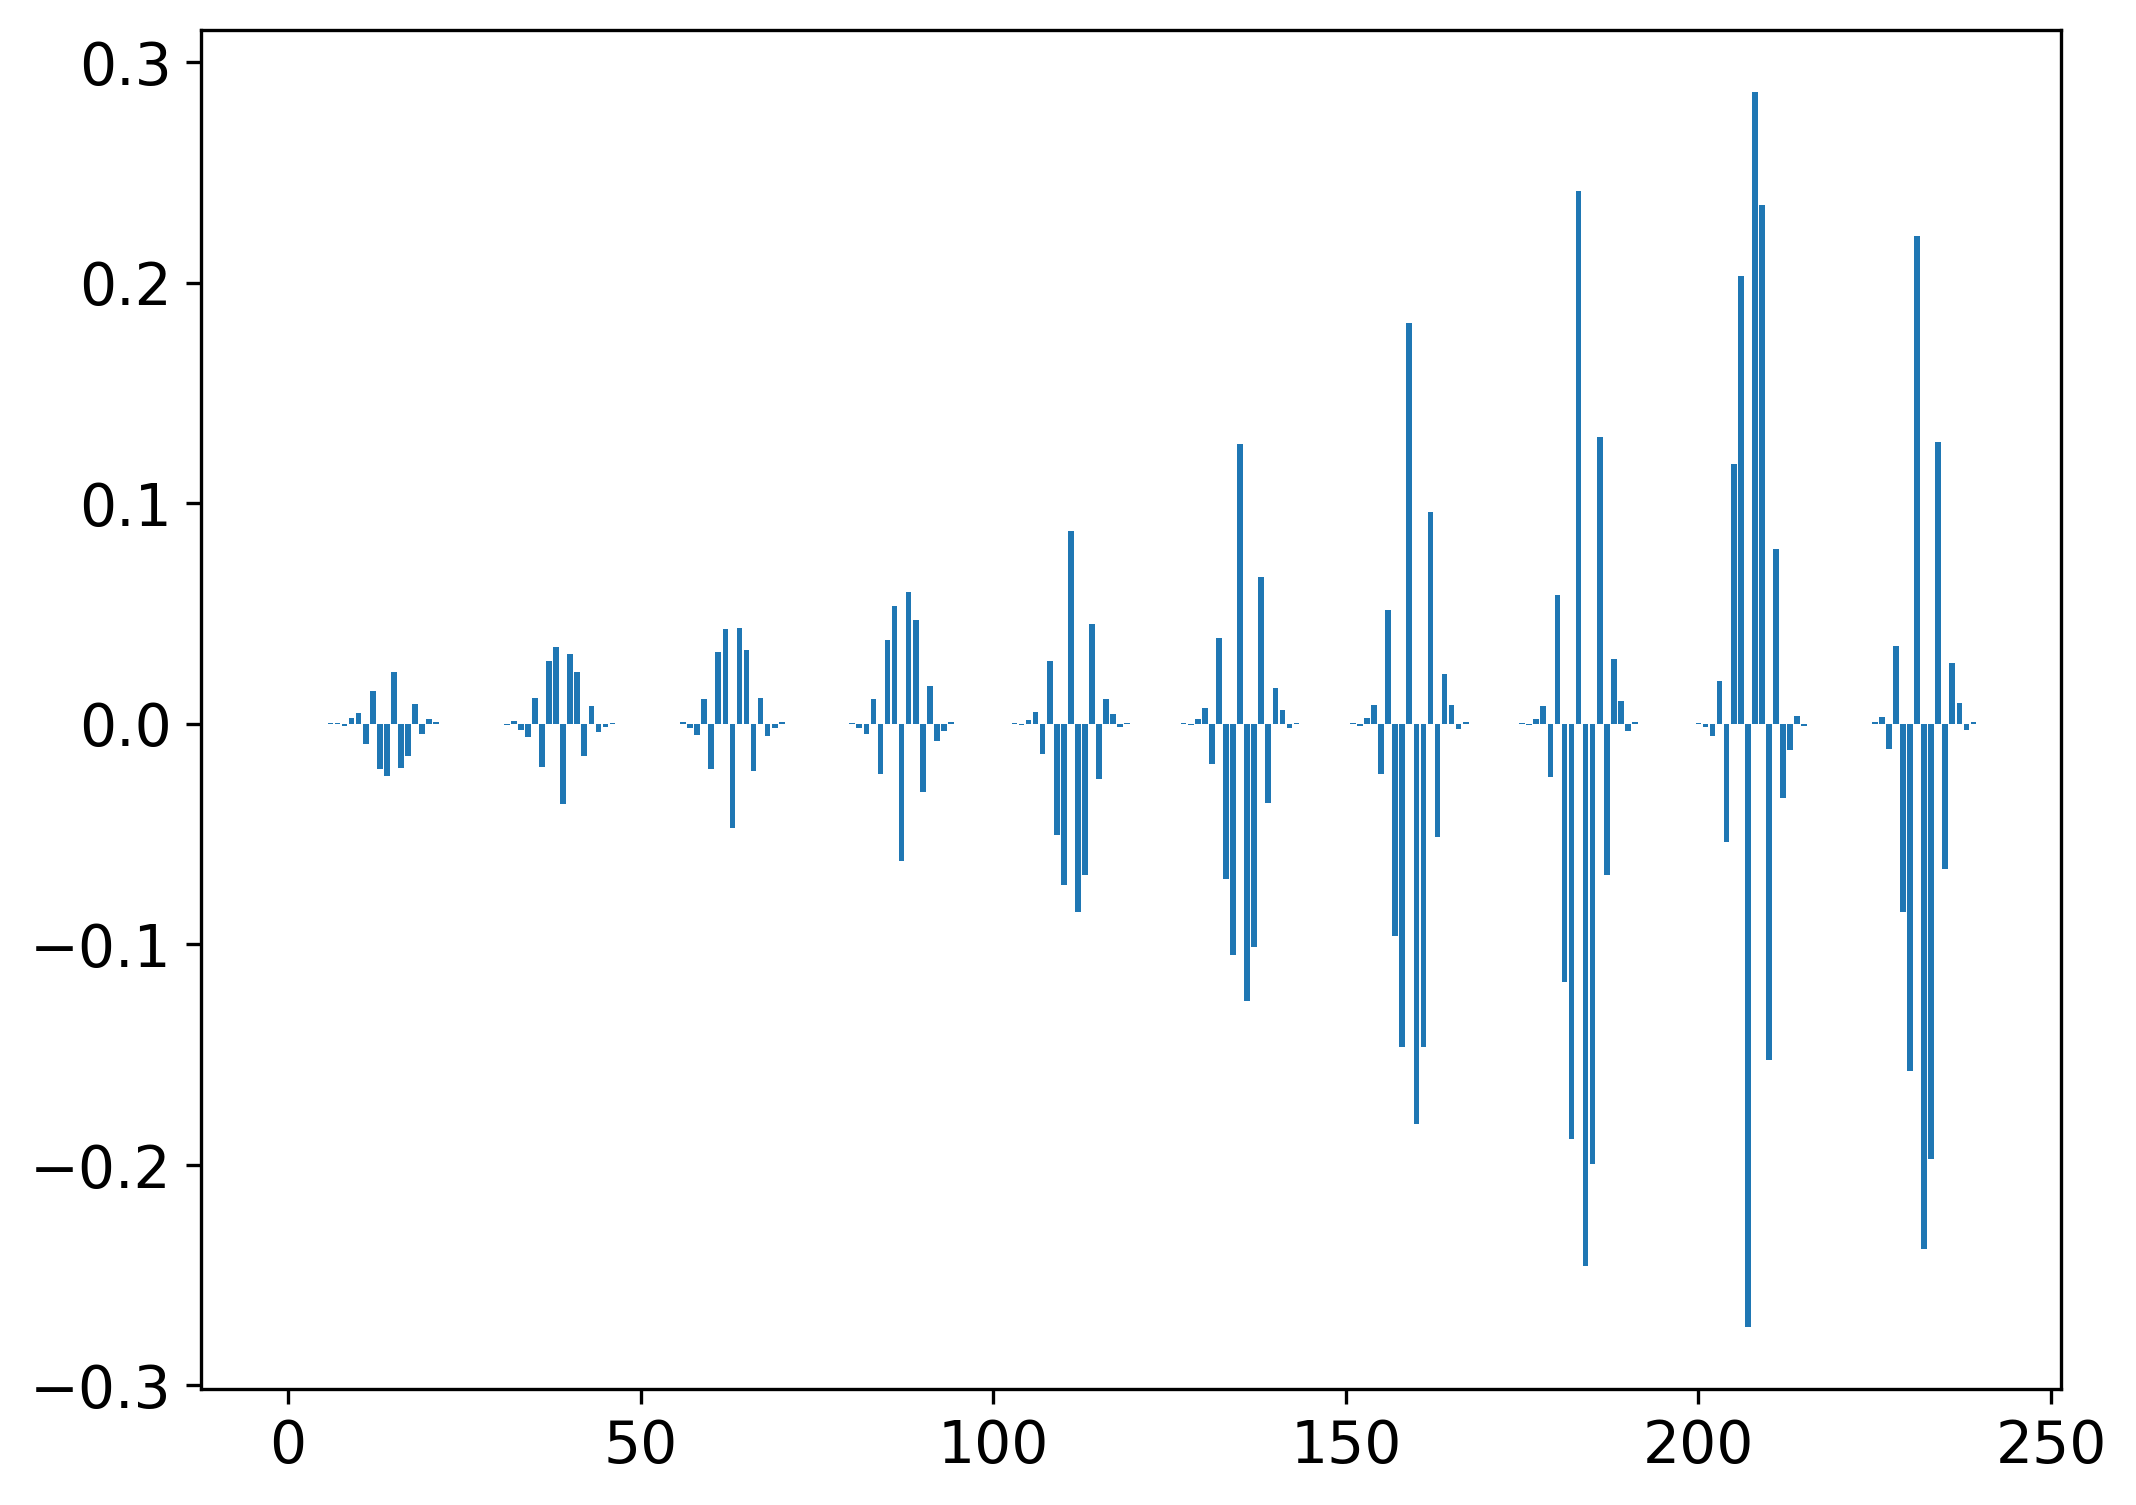

In [9]:
eigvals, eigvecs = np.linalg.eigh(h_dvr)
print(eigvals[0], eigvecs.T[0])
plt.bar(range(eigvecs.shape[1]), eigvecs.T[0])

In [10]:
vec = eigvecs.T[0]
vec = vec.reshape((P if P > 0 else N_R_lim, N_theta))
# vec = vec.reshape(-1)

<BarContainer object of 24 artists>

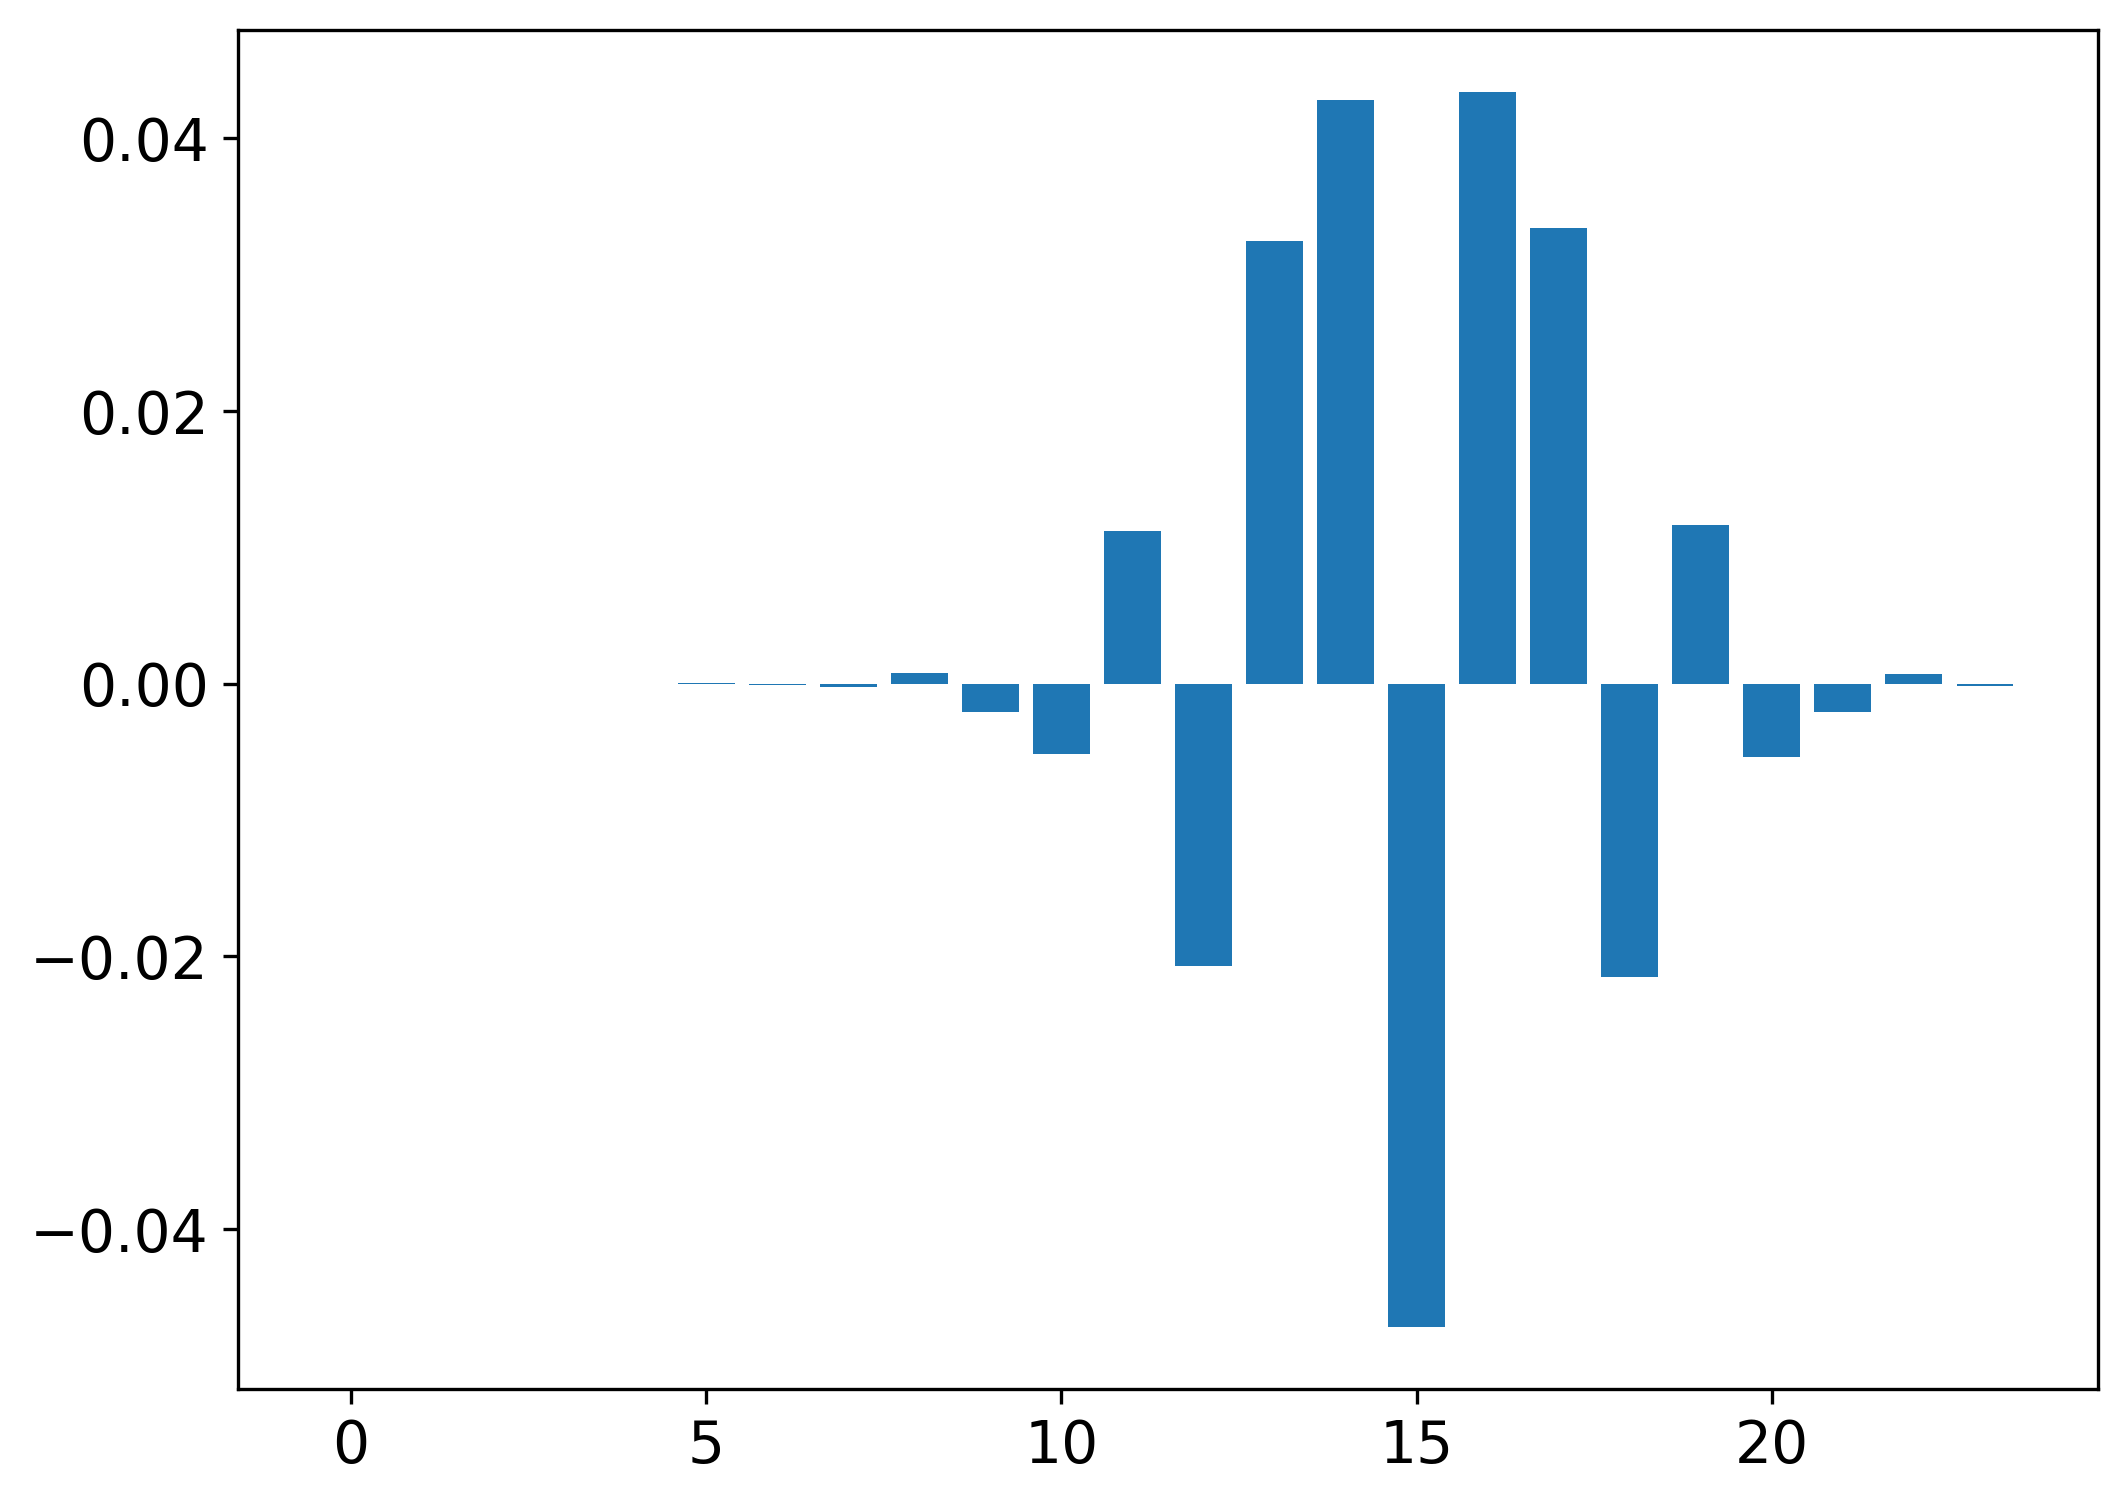

In [11]:
i = 2
plt.bar(range(N_R_lim), eigvecs.T[0][i * N_R_lim:(i+1) * N_R_lim])


In [12]:
eigvecs.T[0].shape

(240,)

In [13]:
np.linspace(np.arccos(Xs_K[0])[-1], np.pi, 24 * 12).shape

(288,)

In [14]:
%autoreload
P = 5

# Rs_DVR5, Xs_K5 = get_DVR_Rtheta(N_R, N_theta, 0, l=l, r_min=r_min, r_max=r_max)
# N_R_lim5 = Rs_DVR.shape[0]
h_dvr5 = get_ham_DVR(pot2d, N_R, N_theta, 0, 0, l=l, r_min=r_min, r_max=r_max, trunc=P)
eigvals5, eigvecs5 = np.linalg.eigh(h_dvr5)
# print(f'[{r_min:.1f}, {r_max:.1f}], N_R = {N_R_lim}, N_theta = {N_theta}: {eigvals[0] * hartree}, diff = {eigvals[0] * hartree - ref_energy:.5f}')

<BarContainer object of 50 artists>

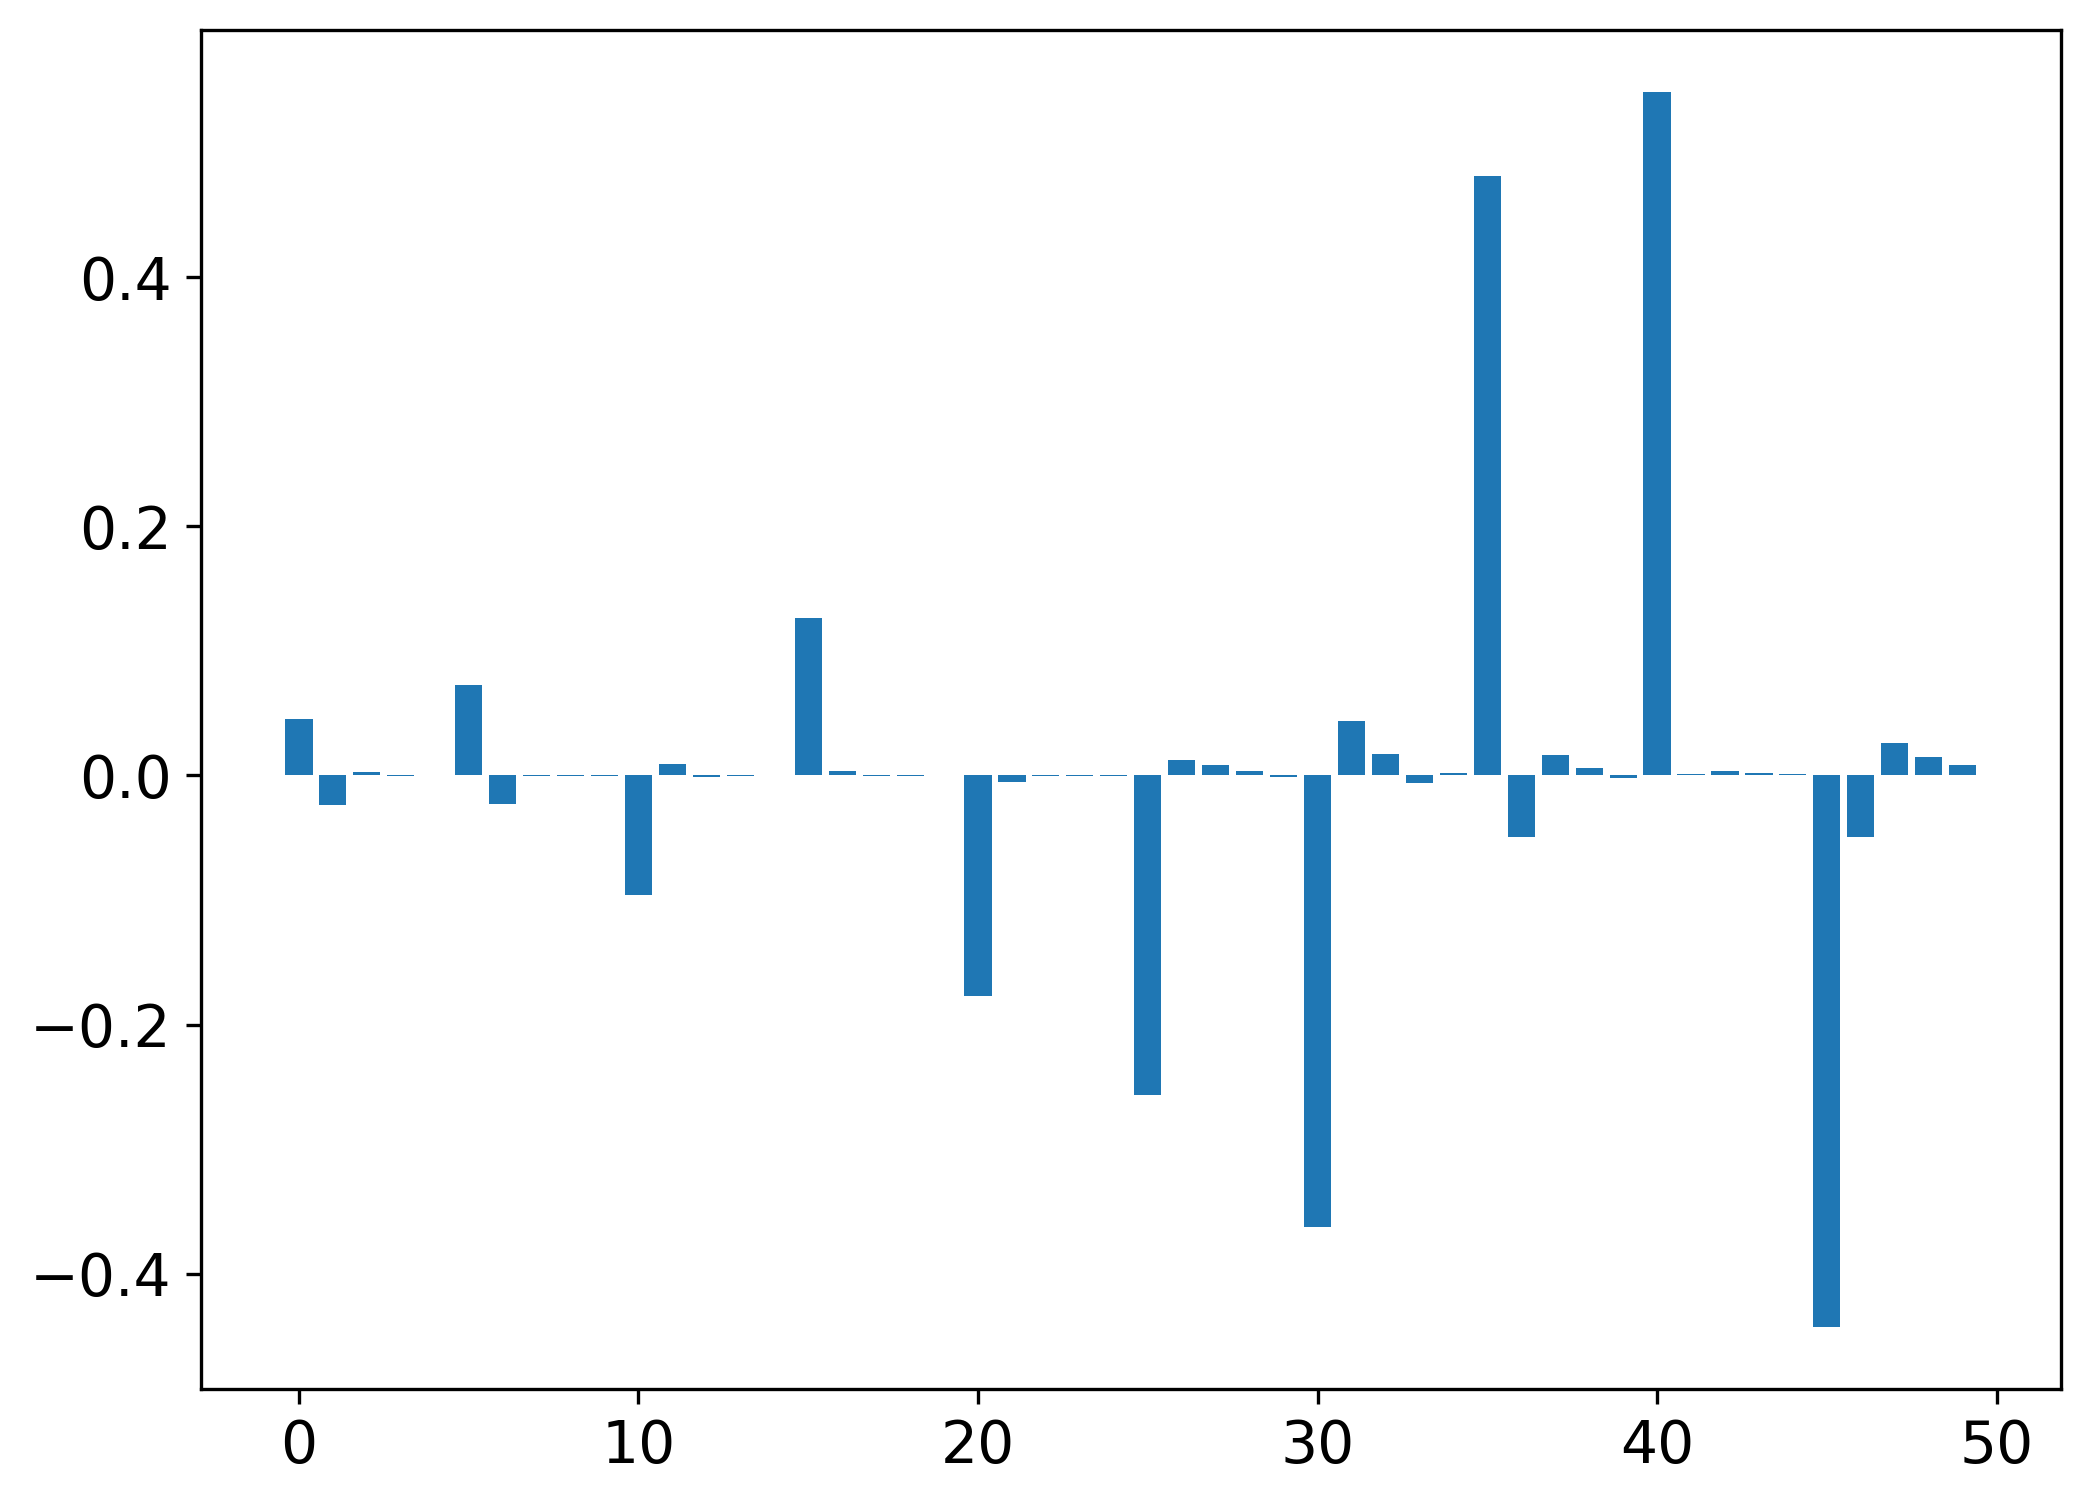

In [15]:
# eigvals, eigvecs = np.linalg.eigh(h_dvr)
# print(eigvals[0], eigvecs.T[0])
plt.bar(range(eigvecs5.shape[1]), eigvecs5.T[0])

In [16]:
eigvecs5.shape

(50, 50)

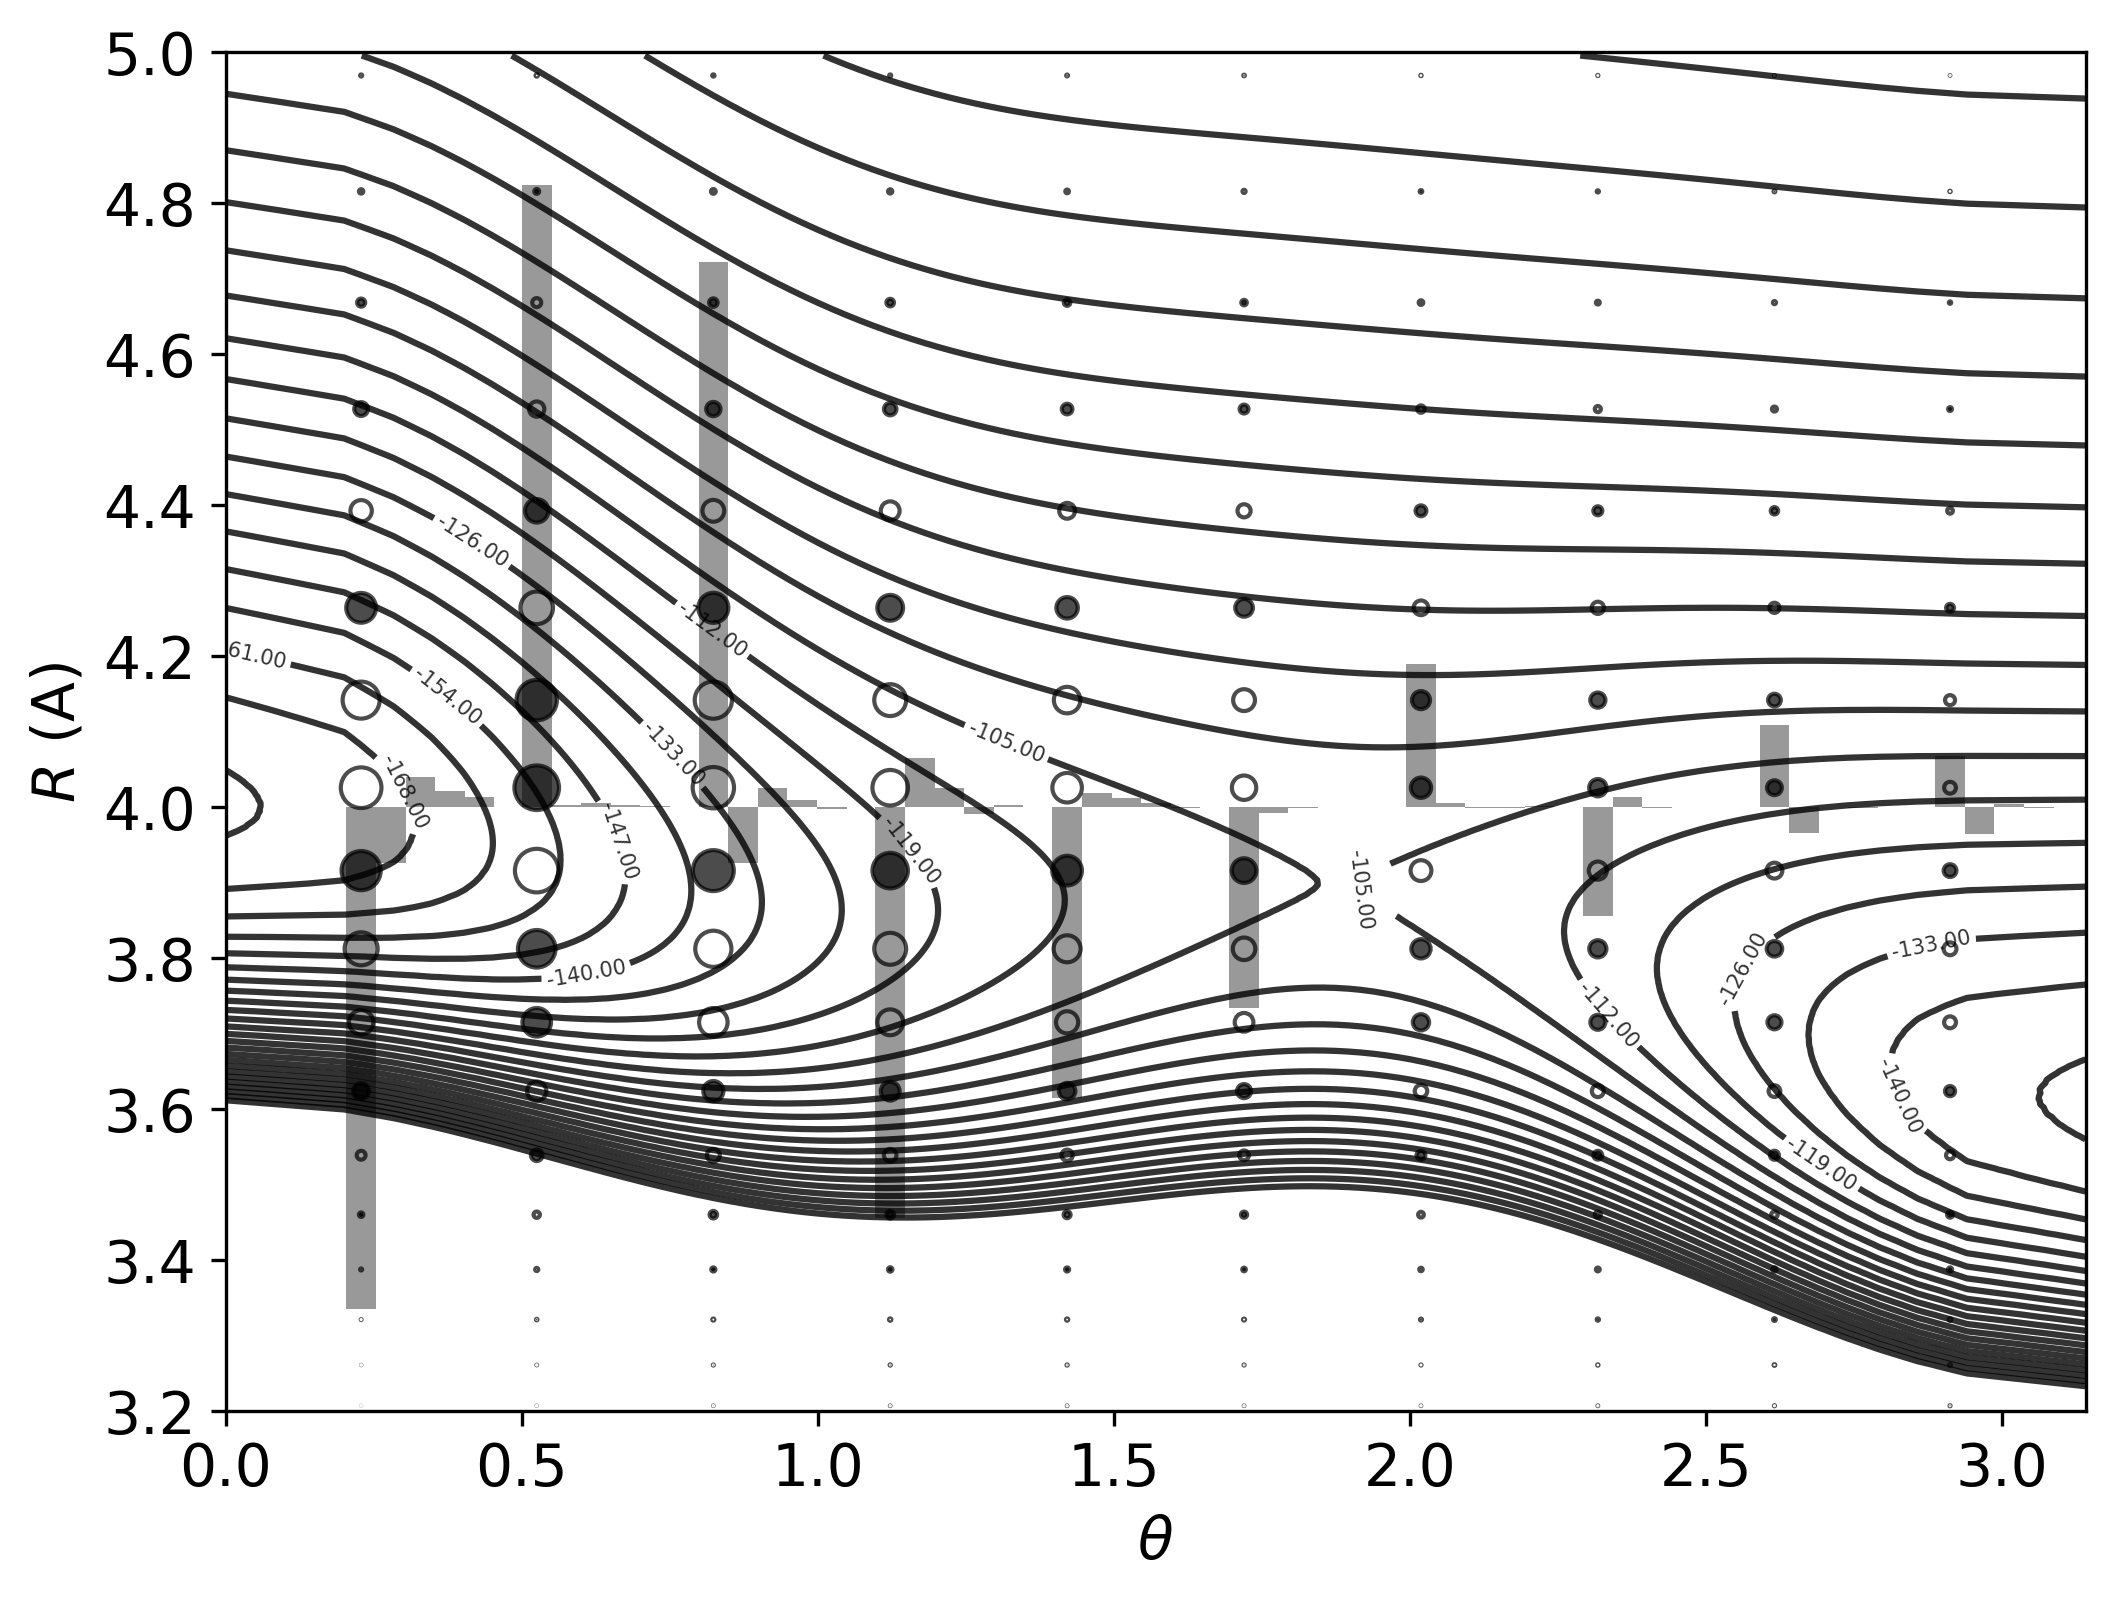

In [342]:
cmap = plt.get_cmap('tab10')

p = plt.tricontour(theta_p[r_p < 5], r_p[r_p < 5], v_p[r_p < 5], levels=np.linspace(-175, 0, 26), colors='black', linestyles='solid', alpha=0.8)
# plt.plot(theta[ind_min1], r[ind_min1], 'x', c='black')
# plt.plot(theta[ind_min2], r[ind_min2], 'x', c='black')
# plt.plot(1.8754889808102941, 3.897, 'o', c='black')
Rs_grid, Xs_grid = np.meshgrid(Rs_DVR * S * au_to_angs, np.arccos(Xs_K[0]))
Rs_grid, Xs_grid = Rs_grid.flatten(), Xs_grid.flatten()

labels = p.levels[:-15:]
plt.clabel(p, inline=1, fontsize=5, levels=labels, fmt='%.2f', use_clabeltext=True)
plt.ylim()
plt.xlabel('$\\theta$')
plt.ylabel('$R$ (A)')
plt.ylim((3.2, 5))
plt.xlim((0, np.pi))

offset = 0.05
plt.bar(np.arccos(Xs_K[0]), eigvecs5.T[0][::5] * 1.5, bottom=4, width=0.05, color='black', alpha=0.4)
plt.bar(np.arccos(Xs_K[0]) + 1 * offset, eigvecs5.T[0][1::5] * 1.5, bottom=4, width=0.05, color='black', alpha=0.4)
plt.bar(np.arccos(Xs_K[0]) + 2 * offset, eigvecs5.T[0][2::5] * 1.5, bottom=4, width=0.05, color='black', alpha=0.4)
plt.bar(np.arccos(Xs_K[0]) + 3 * offset, eigvecs5.T[0][3::5] * 1.5, bottom=4, width=0.05, color='black', alpha=0.4)
plt.bar(np.arccos(Xs_K[0]) + 4 * offset, eigvecs5.T[0][4::5] * 1.5, bottom=4, width=0.05, color='black', alpha=0.4)
# plt.axhline(4.0, linestyle='dashed', c='black', linewidth=0.2)

for i in range(N_theta):
    evec = eigvecs.T[0][i * N_R_lim:(i+1) * N_R_lim]
    epos = np.where(evec >=0, evec, 0)
    eneg = np.where(evec <0, -evec, 0)
    plt.scatter(np.repeat(np.arccos(Xs_K[0][i]), N_R_lim), Rs_DVR * S * au_to_angs, marker='o', facecolors='black', edgecolors='black', s=epos * 400, zorder=20, alpha=0.7)
    plt.scatter(np.repeat(np.arccos(Xs_K[0][i]), N_R_lim), Rs_DVR * S * au_to_angs, facecolors='none', edgecolors='black', s=eneg * 400, alpha=0.7, zorder=20)

In [189]:
from scipy.optimize import minimize

x = 0
f = lambda r: pot2d([r], [x]) * hartree
minimize(f, 3.5)

/Users/user/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


KeyboardInterrupt: 